In [1]:
#Installations of necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics


## Exploratory Data Analysis

In [2]:
#Import wooldridge loanapp dataset into code as df with approbal as target
import wooldridge
  
# fetch dataset
loanapp_df = wooldridge.data('loanapp')
loanapp_df


,occ,loanamt,action,msa,suffolk,appinc,typur,unit,married,dep,...,approve,mortno,mortperf,mortlat1,mortlat2,chist,multi,loanprc,thick,white
0,1,89,1,1120,0,72,0,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.754237,0.0,1
1,1,128,3,1120,0,74,0,1.0,1.0,1.0,...,0,0,1,0,0,1,0.0,0.800000,1.0,1
2,1,128,1,1120,0,84,3,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.895105,1.0,1
3,1,66,1,1120,0,36,0,1.0,1.0,0.0,...,1,0,1,0,0,0,0.0,0.600000,0.0,1
4,1,120,1,1120,0,59,8,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.895522,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,158,1,1120,0,96,0,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.897727,0.0,1
1985,1,35,1,1120,0,169,1,1.0,1.0,0.0,...,1,1,0,0,0,1,0.0,0.111111,0.0,1
1986,2,225,1,1120,0,49,0,2.0,1.0,0.0,...,1,0,1,0,0,1,1.0,1.000000,0.0,1
1987,1,98,1,1120,1,110,1,1.0,0.0,0.0,...,1,1,0,0,0,1,0.0,0.455814,0.0,1


In [3]:
# Perform EDA 
print(loanapp_df)
print(loanapp_df.info())

print(loanapp_df[["approve"]])



      occ  loanamt  action   msa  suffolk  appinc  typur  unit  married  dep  \
0       1       89       1  1120        0      72      0   1.0      0.0  0.0   
1       1      128       3  1120        0      74      0   1.0      1.0  1.0   
2       1      128       1  1120        0      84      3   1.0      0.0  0.0   
3       1       66       1  1120        0      36      0   1.0      1.0  0.0   
4       1      120       1  1120        0      59      8   1.0      1.0  0.0   
...   ...      ...     ...   ...      ...     ...    ...   ...      ...  ...   
1984    1      158       1  1120        0      96      0   1.0      1.0  0.0   
1985    1       35       1  1120        0     169      1   1.0      1.0  0.0   
1986    2      225       1  1120        0      49      0   2.0      1.0  0.0   
1987    1       98       1  1120        1     110      1   1.0      0.0  0.0   
1988    1      133       3  1120        0      55      0   1.0      0.0  0.0   

      ...  approve  mortno  mortperf  m

In [4]:
approve_counts = loanapp_df["approve"].value_counts()
print(approve_counts)

reject_counts = loanapp_df["reject"].value_counts()
print(reject_counts)

approve
1    1745
0     244
Name: count, dtype: int64
reject
0    1745
1     244
Name: count, dtype: int64


In [5]:
#describe the attributes
describe_include = loanapp_df.iloc[:, 0:59]
#print(describe_include)
describe_include.describe(include='all')

print(loanapp_df.dtypes)

occ           int64
loanamt       int64
action        int64
msa           int64
suffolk       int64
appinc        int64
typur         int64
unit        float64
married     float64
dep         float64
emp           int64
yjob          int64
self          int64
atotinc     float64
cototinc    float64
hexp        float64
price       float64
other       float64
liq         float64
rep         float64
gdlin         int64
lines       float64
mortg         int64
cons          int64
pubrec        int64
hrat        float64
obrat       float64
fixadj        int64
term        float64
apr         float64
prop          int64
inss          int64
inson         int64
gift          int64
cosign        int64
unver         int64
review        int64
netw        float64
unem        float64
min30       float64
bd            int64
mi            int64
old           int64
vr            int64
sch           int64
black         int64
hispan        int64
male        float64
reject        int64
approve       int64


In [6]:
#reference: Analytics Vidhya Step-by-Step Exploratory Data Analysis (EDA) using Python 
#reference link: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

#checking number of data types
print(loanapp_df.dtypes)

occ           int64
loanamt       int64
action        int64
msa           int64
suffolk       int64
appinc        int64
typur         int64
unit        float64
married     float64
dep         float64
emp           int64
yjob          int64
self          int64
atotinc     float64
cototinc    float64
hexp        float64
price       float64
other       float64
liq         float64
rep         float64
gdlin         int64
lines       float64
mortg         int64
cons          int64
pubrec        int64
hrat        float64
obrat       float64
fixadj        int64
term        float64
apr         float64
prop          int64
inss          int64
inson         int64
gift          int64
cosign        int64
unver         int64
review        int64
netw        float64
unem        float64
min30       float64
bd            int64
mi            int64
old           int64
vr            int64
sch           int64
black         int64
hispan        int64
male        float64
reject        int64
approve       int64


In [7]:
loanapp_df.columns = loanapp_df.columns.get_level_values(0)


In [8]:
#removing irrelevant variables, as defined in Yang (2024), 
# plus hispan, min30, pubrec, and old (and without asian or pubhist)
loanapp_df = loanapp_df[['approve', 'appinc', 'hrat', 'obrat', 'emp', 'self', 'liq', 
                         'netw', 'price', 'apr', 'black', 'other', 'atotinc', 'dep', 'married', 'male', 'pubrec',
                         'sch', 'loanamt', 'loanprc', 'thick', 'multi', 'white', 'hispan', 'min30', 'old']]
loanapp_df

print(loanapp_df.dtypes)
len(loanapp_df.columns)




approve      int64
appinc       int64
hrat       float64
obrat      float64
emp          int64
self         int64
liq        float64
netw       float64
price      float64
apr        float64
black        int64
other      float64
atotinc    float64
dep        float64
married    float64
male       float64
pubrec       int64
sch          int64
loanamt      int64
loanprc    float64
thick      float64
multi      float64
white        int64
hispan       int64
min30      float64
old          int64
dtype: object


26

In [9]:
#seperating into binary and non-binary variables
bin_cols = loanapp_df[['approve', 'self', 'black', 'married', 'male', 'pubrec',
                         'sch', 'thick', 'multi', 'white', 'hispan', 'min30', 'old']]
bin_cols



,approve,self,black,married,male,pubrec,sch,thick,multi,white,hispan,min30,old
0,1,0,0,0.0,NaN,0,1,0.0,0.0,1,0,0.0,0
1,0,0,0,1.0,1.0,0,1,1.0,0.0,1,0,0.0,0
2,1,0,0,0.0,1.0,0,1,1.0,0.0,1,0,0.0,0
3,1,1,0,1.0,1.0,1,1,0.0,0.0,1,0,0.0,1
4,1,0,0,1.0,1.0,0,0,0.0,0.0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,0,0,1.0,1.0,0,1,0.0,0.0,1,0,0.0,0
1985,1,0,0,1.0,1.0,0,1,0.0,0.0,1,0,0.0,1
1986,1,1,0,1.0,1.0,0,0,0.0,1.0,1,0,0.0,1
1987,1,1,0,0.0,1.0,0,1,0.0,0.0,1,0,0.0,1


In [10]:
len(bin_cols.columns)

13

In [11]:
nbin_cols = loanapp_df[['appinc', 'hrat', 'obrat', 'emp', 'liq', 
                         'netw', 'price', 'apr',  'other', 'atotinc', 'dep', 'loanamt', 'loanprc']]
nbin_cols

,appinc,hrat,obrat,emp,liq,netw,price,apr,other,atotinc,dep,loanamt,loanprc
0,72,17.629999,34.500000,0,34.500000,99.599998,118.0,118.0,0.0,5849.0,0.0,89,0.754237
1,74,22.540001,34.099998,0,52.000000,847.000000,160.0,175.0,0.0,4583.0,1.0,128,0.800000
2,84,19.000000,26.000000,1,37.000000,40.000000,143.0,145.0,0.0,2666.0,0.0,128,0.895105
3,36,24.000000,37.000000,0,19.000000,158.000000,110.0,110.0,0.0,3000.0,0.0,66,0.600000
4,59,25.100000,32.099998,0,31.000000,69.000000,134.0,135.0,0.0,2583.0,0.0,120,0.895522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,96,20.299999,29.299999,0,15.000000,19.000000,176.0,176.0,0.0,5000.0,0.0,158,0.897727
1985,169,8.000000,20.000000,0,64.000000,1745.000000,315.0,315.0,0.0,9583.0,0.0,35,0.111111
1986,49,56.099998,60.500000,0,10.000000,7.000000,225.0,230.0,0.0,4159.0,0.0,225,1.000000
1987,110,16.000000,17.000000,0,427.899994,641.900024,215.0,180.0,0.0,9200.0,0.0,98,0.455814


In [12]:
len(nbin_cols.columns)

13

appinc
Skew : 5.27


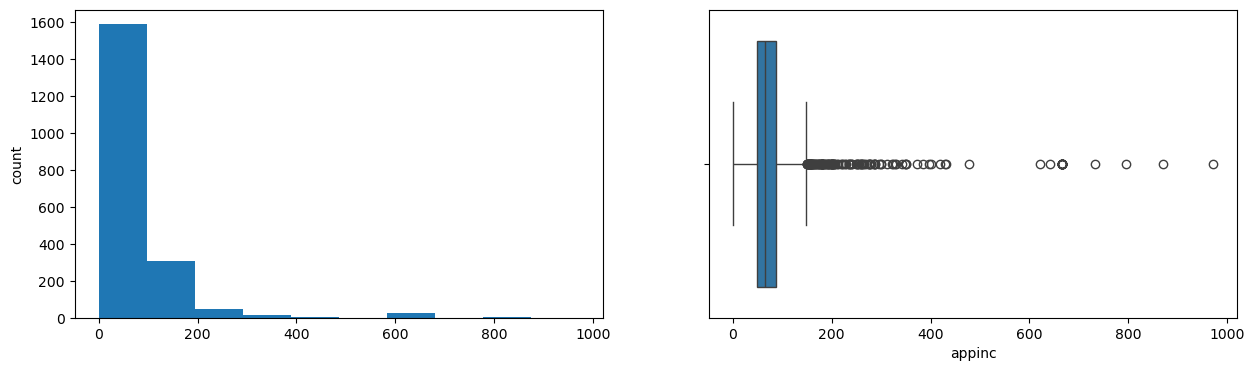

hrat
Skew : 0.25


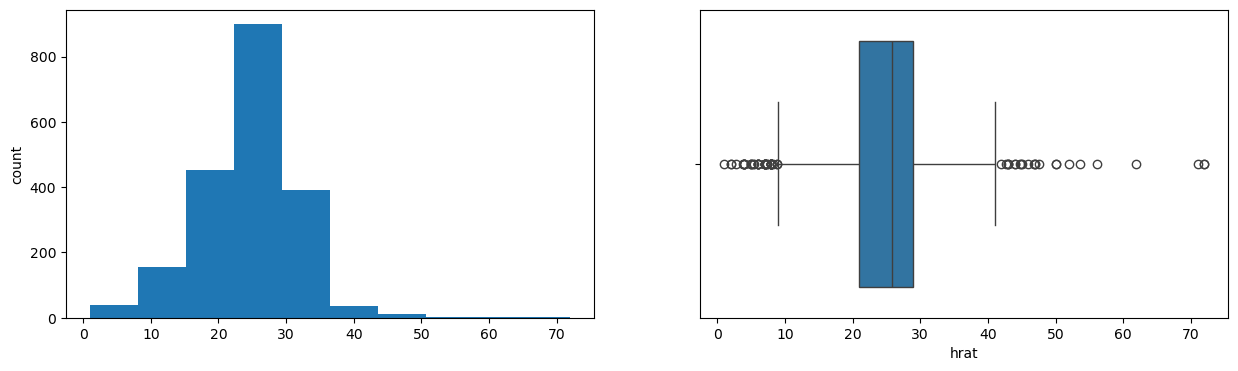

obrat
Skew : 0.44


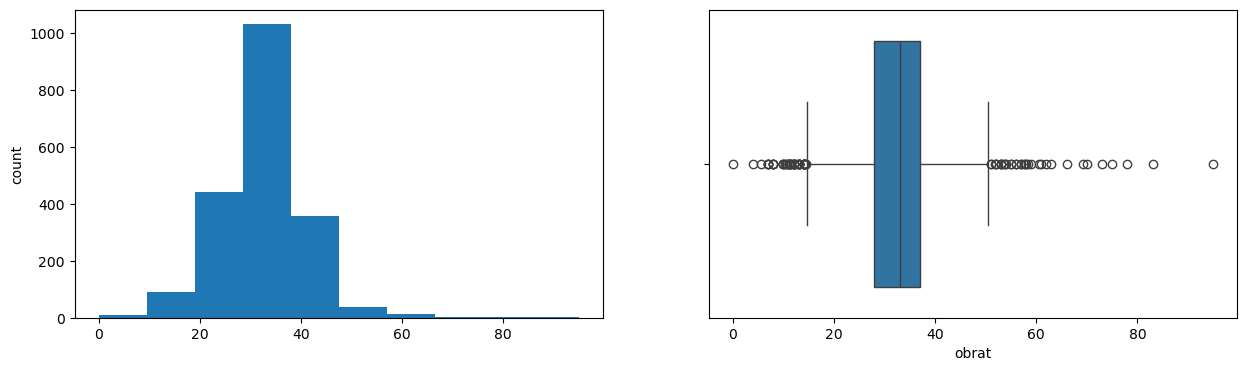

emp
Skew : 6.69


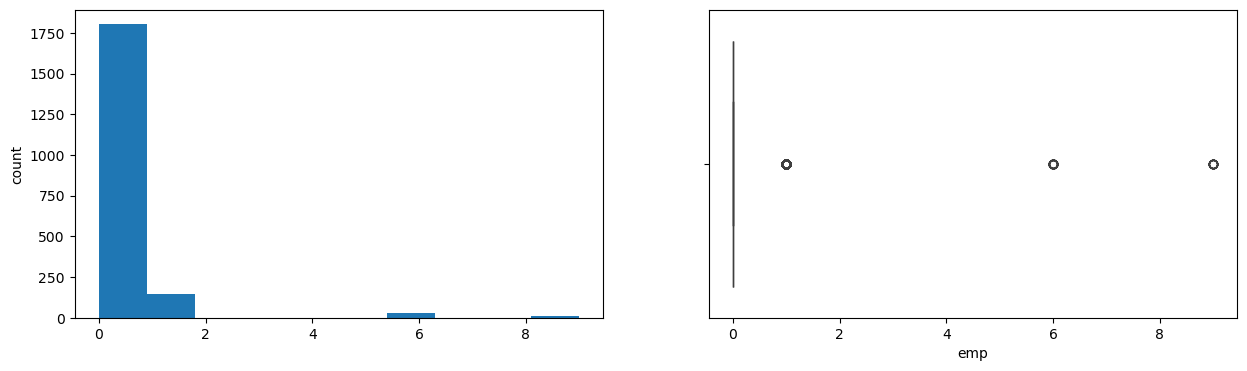

liq
Skew : 14.78


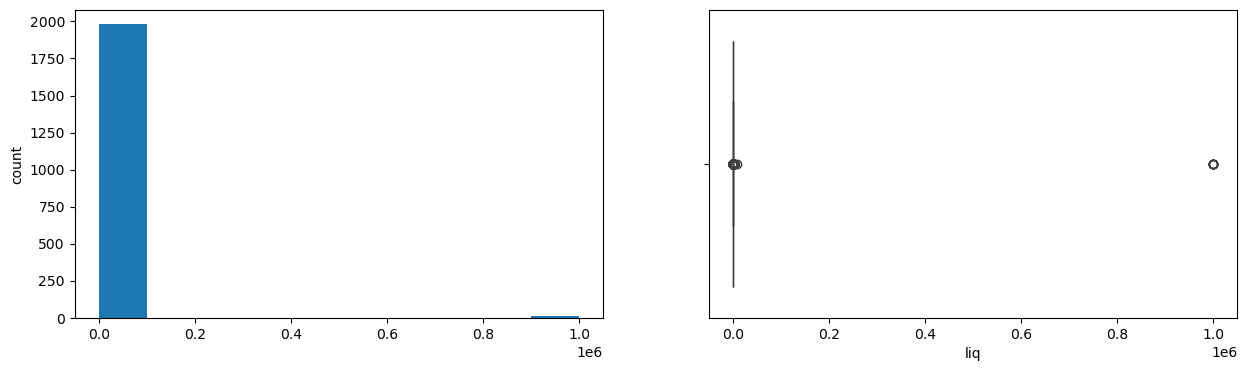

netw
Skew : 15.05


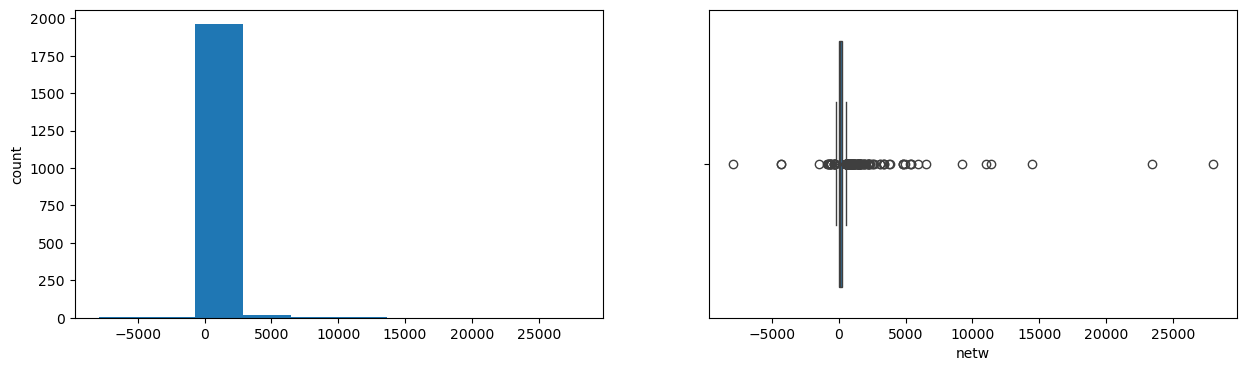

price
Skew : 4.0


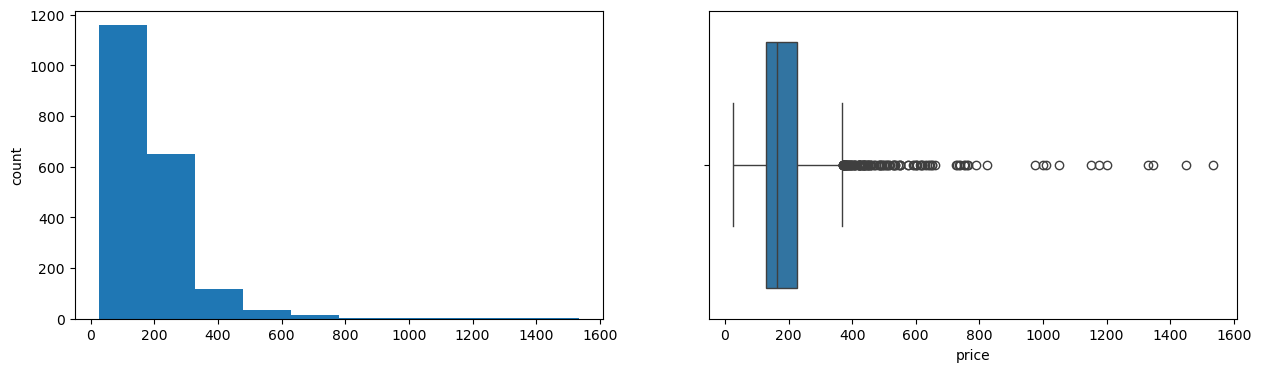

apr
Skew : 11.07


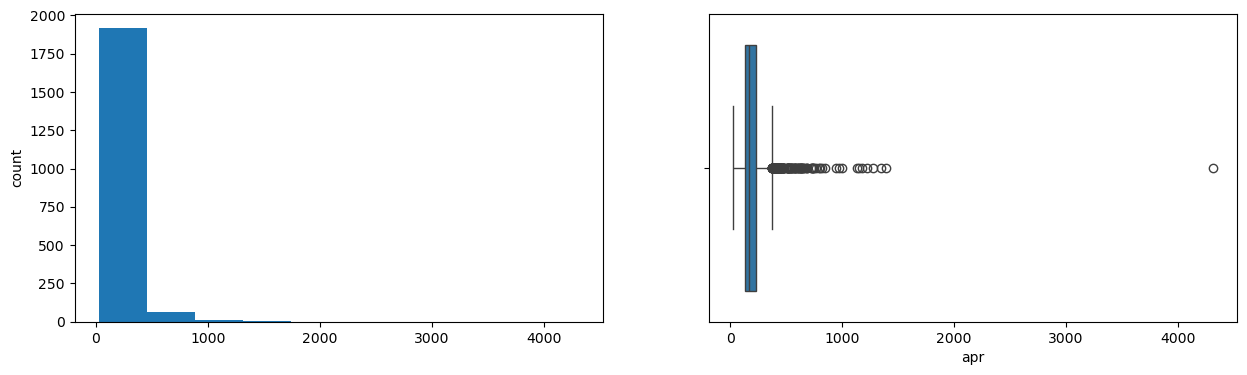

other
Skew : 26.82


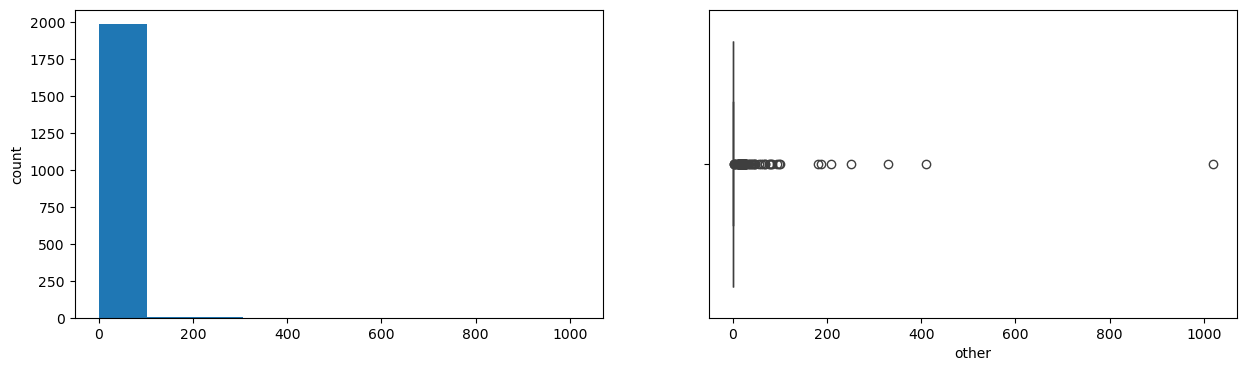

atotinc
Skew : 6.37


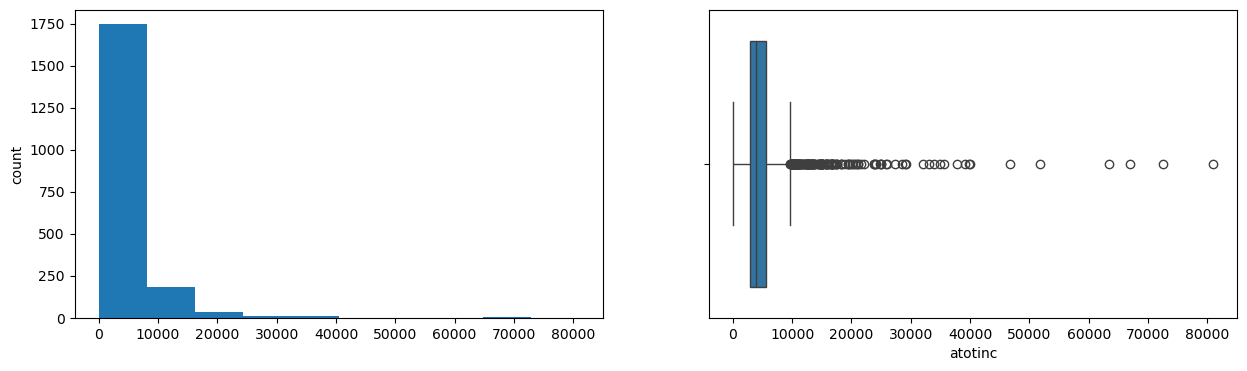

dep
Skew : 1.47


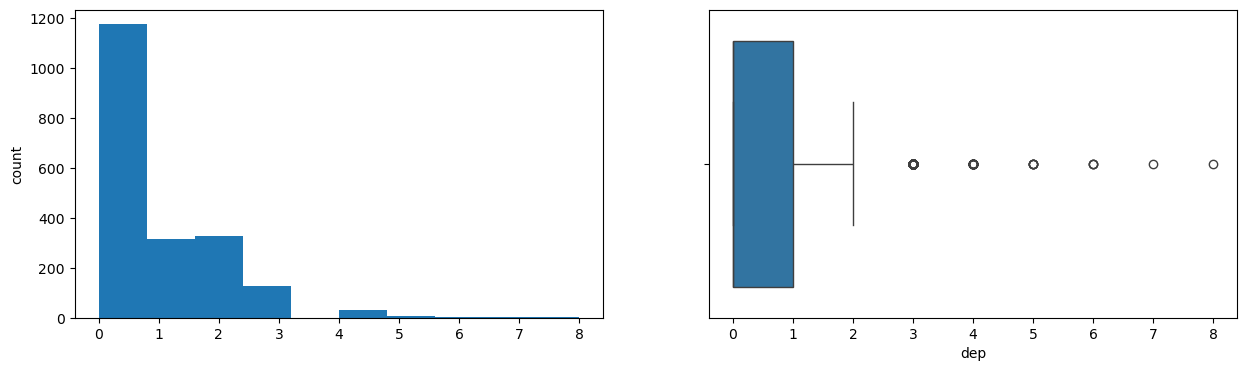

loanamt
Skew : 3.13


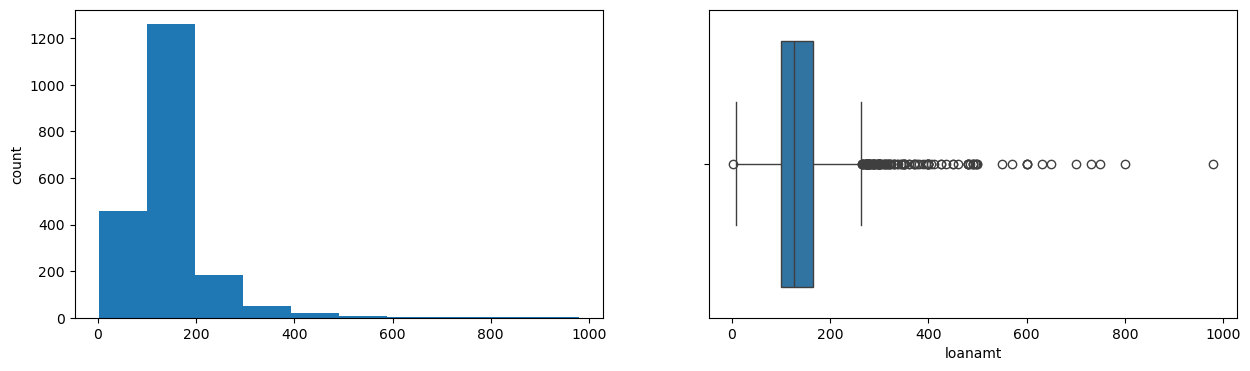

loanprc
Skew : 0.44


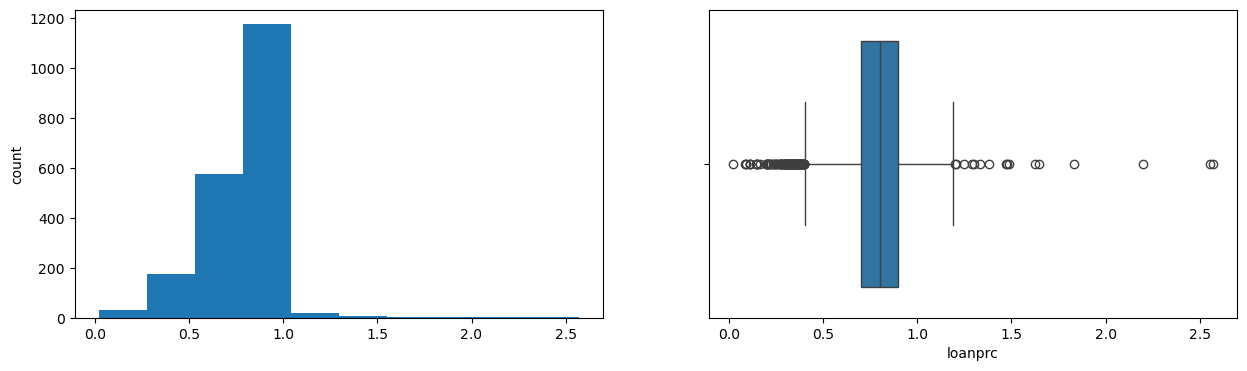

In [13]:
#reference: Analytics Vidhya Step-by-Step Exploratory Data Analysis (EDA) using Python 
#reference link: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

#visualize non-binary (continuous) variables

for col in nbin_cols:
    print(col)
    print('Skew :', round(loanapp_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    loanapp_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=loanapp_df[col])
    plt.show()

approve
Skew : -2.3


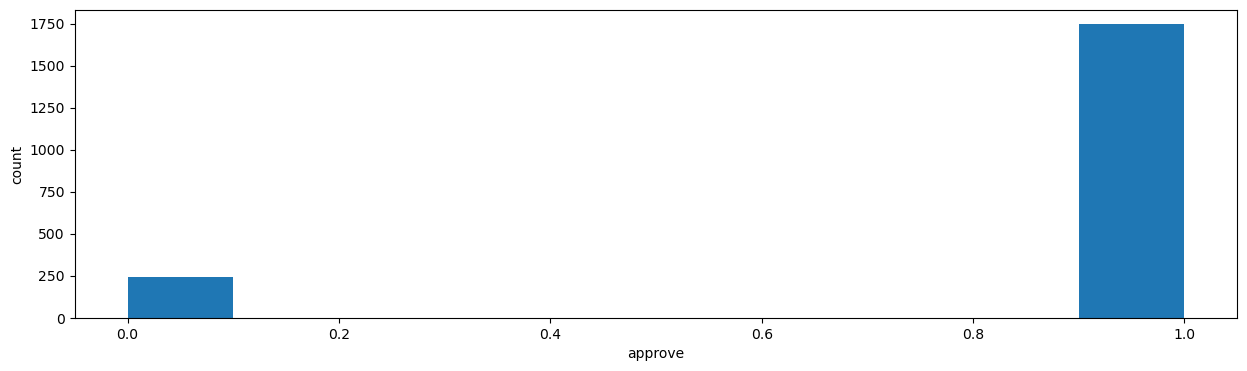

self
Skew : 2.21


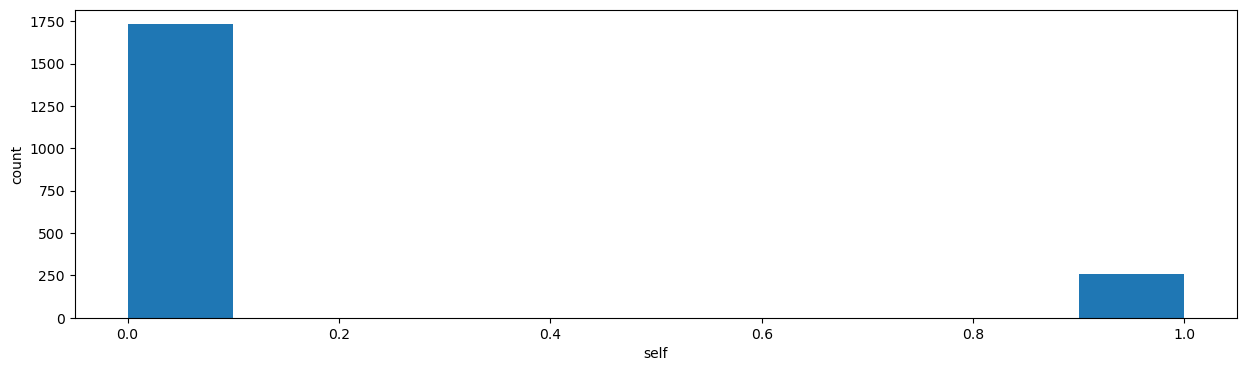

black
Skew : 2.69


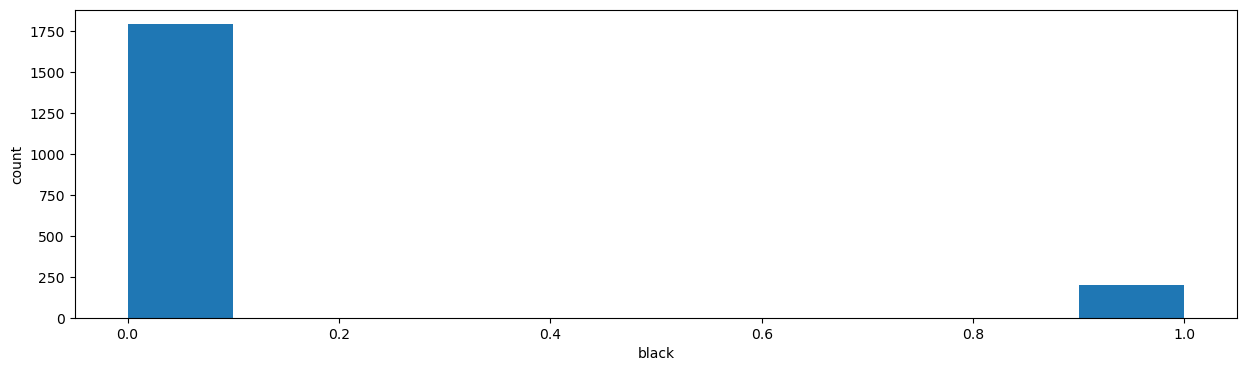

married
Skew : -0.67


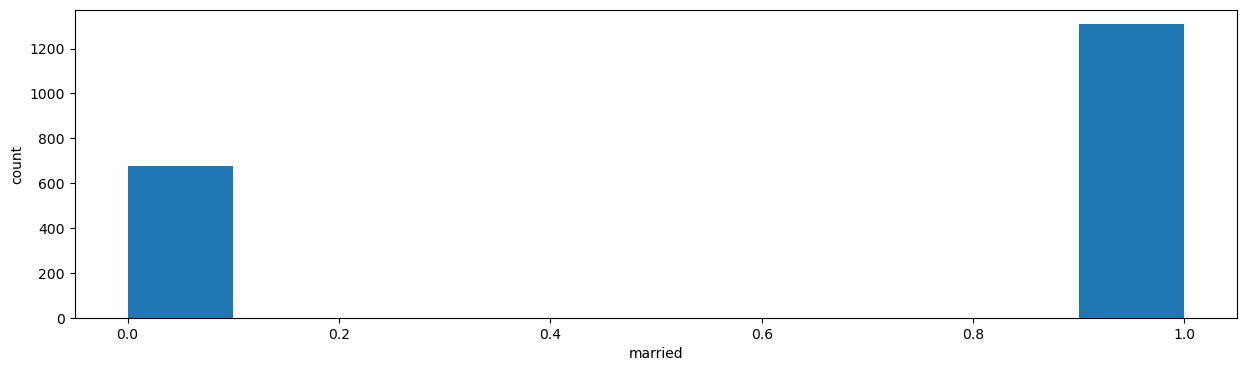

male
Skew : -1.61


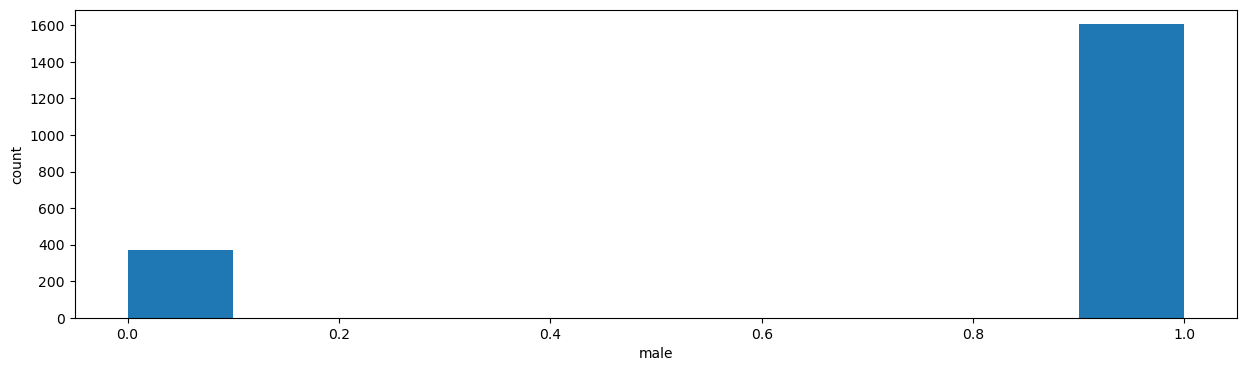

pubrec
Skew : 3.41


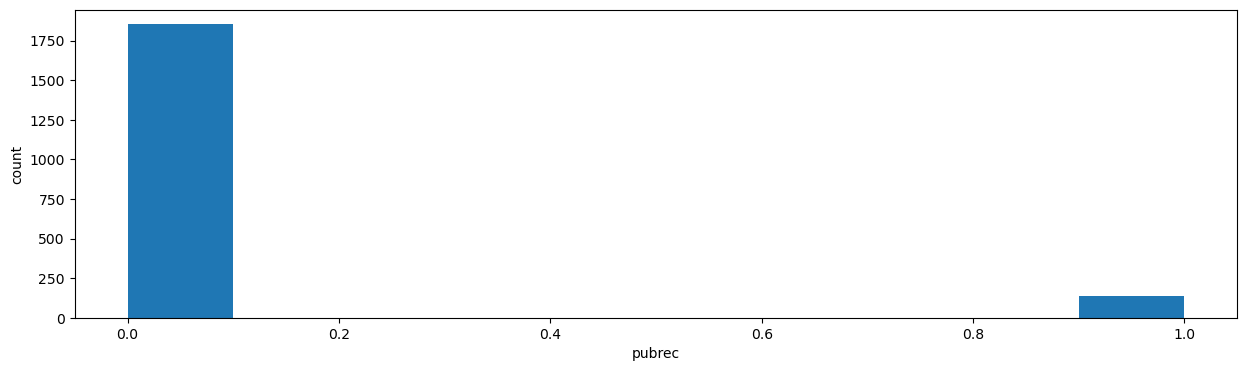

sch
Skew : -1.3


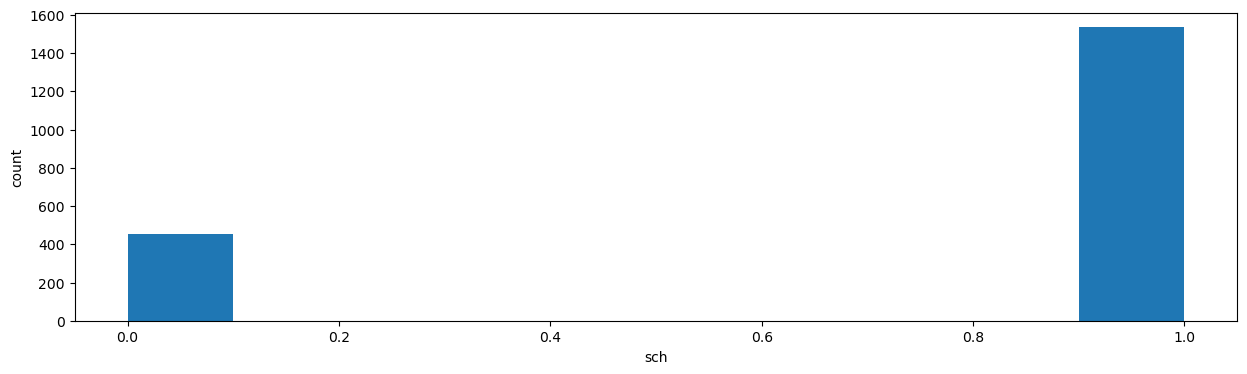

thick
Skew : 2.58


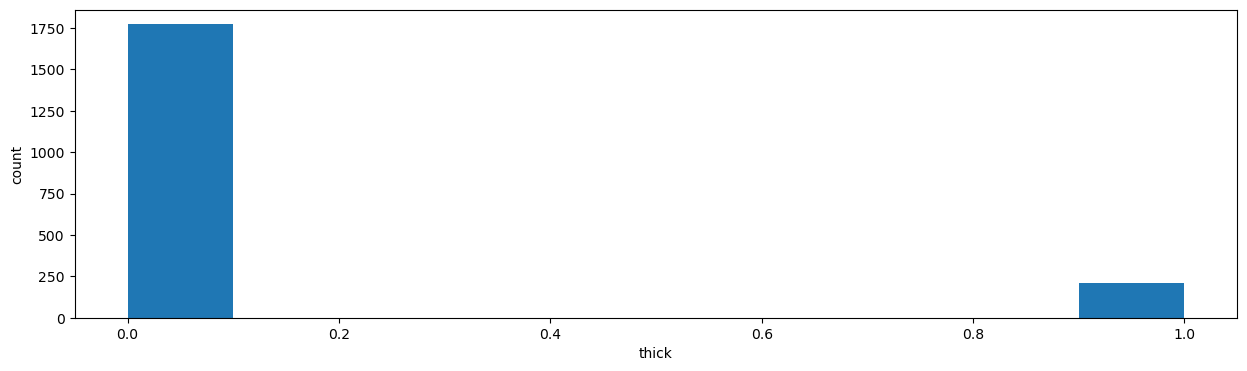

multi
Skew : 2.95


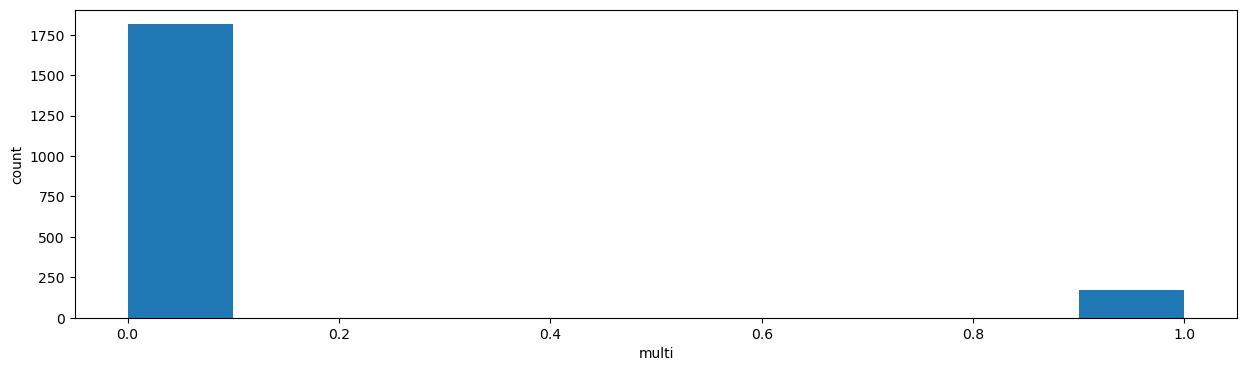

white
Skew : -1.91


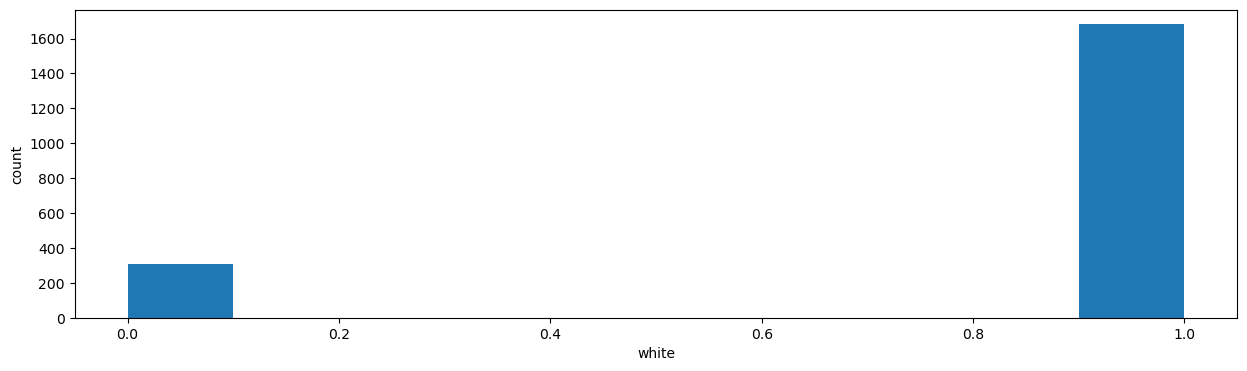

hispan
Skew : 3.87


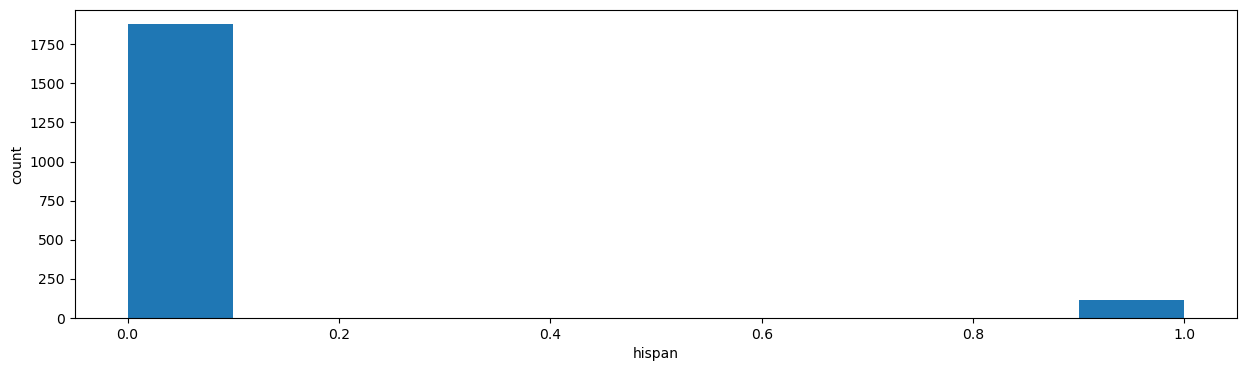

min30
Skew : 3.82


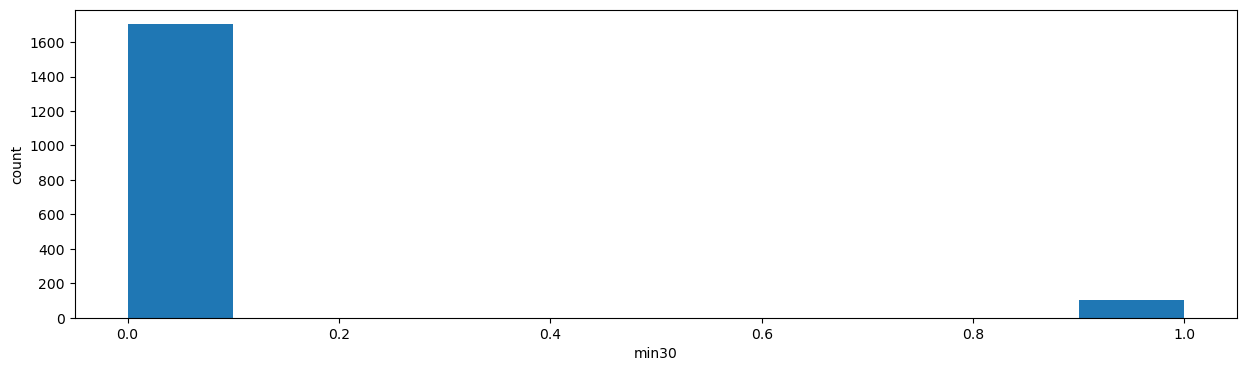

old
Skew : 0.13


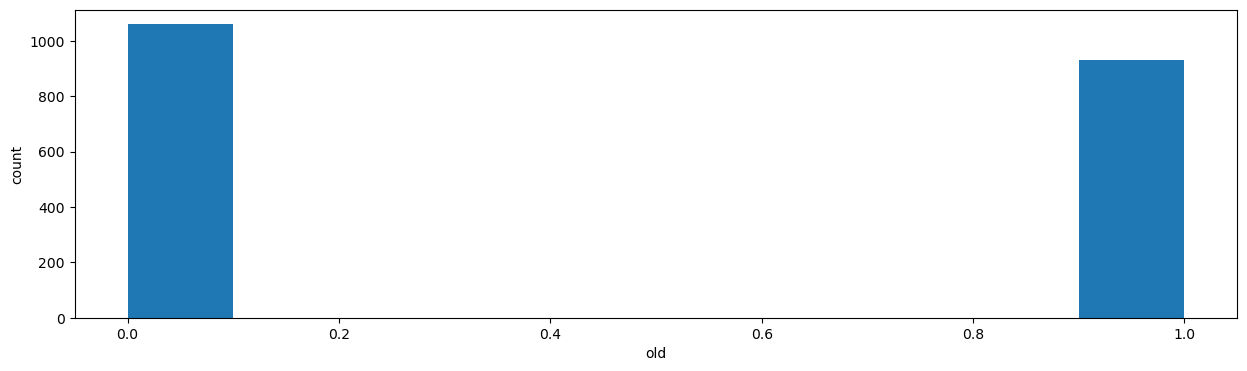

In [14]:
#visualize binary variables 
for col in bin_cols:
    print(col)
    print('Skew :', round(loanapp_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 1, 1)
    loanapp_df[col].hist(grid=False)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()




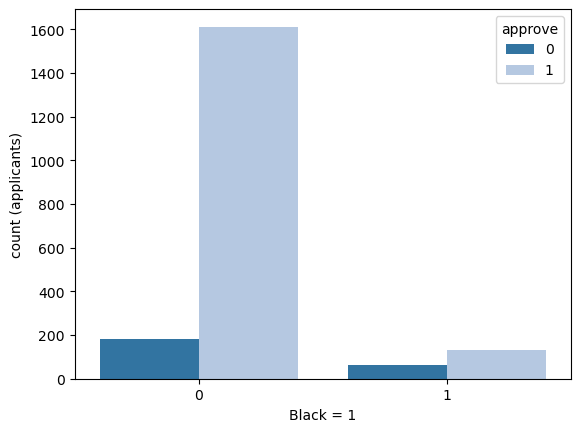

In [15]:
# create seaborn bar plots with hues for some binary variables

#black vs nonblack
sns.countplot(x='black', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('Black = 1')
plt.ylabel('count (applicants)')
plt.show()


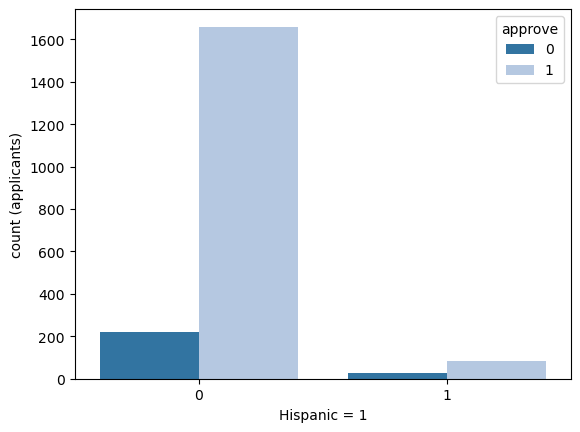

In [16]:
#hispan
sns.countplot(x='hispan', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('Hispanic = 1')
plt.ylabel('count (applicants)')
plt.show()

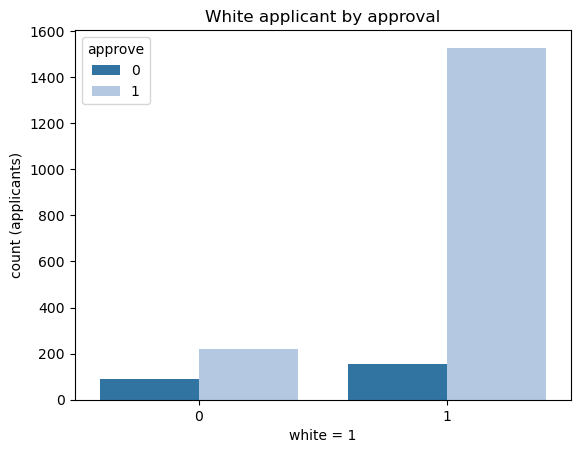

In [17]:
#white
sns.countplot(x='white', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('white = 1')
plt.ylabel('count (applicants)')
plt.title('White applicant by approval', size = 12)
plt.show()

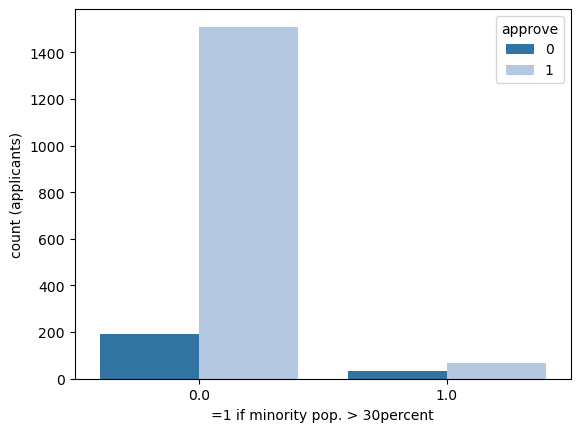

In [18]:
#min30
sns.countplot(x='min30', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('=1 if minority pop. > 30percent')
plt.ylabel('count (applicants)')
plt.show()

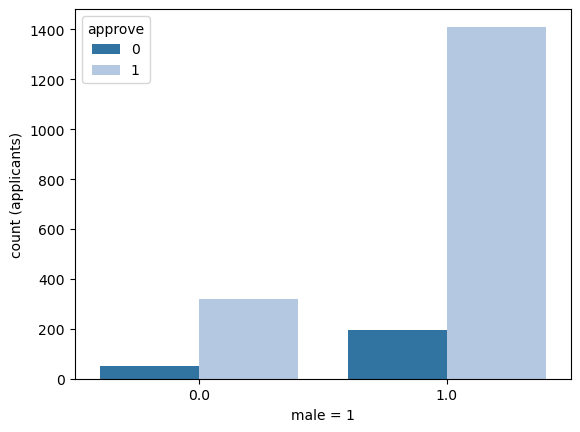

In [19]:
#male
sns.countplot(x='male', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('male = 1')
plt.ylabel('count (applicants)')
plt.show()

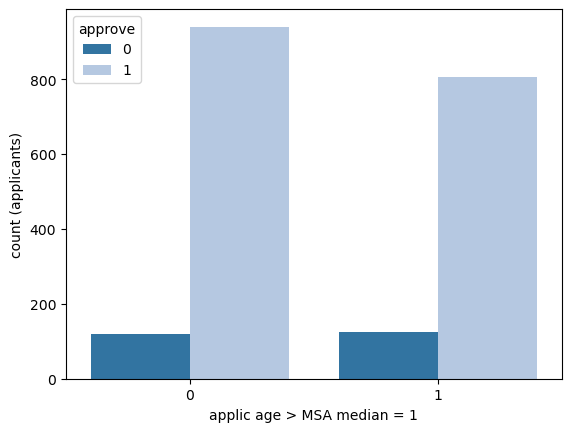

In [20]:
#old
sns.countplot(x='old', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('applic age > MSA median = 1')
plt.ylabel('count (applicants)')
plt.show()

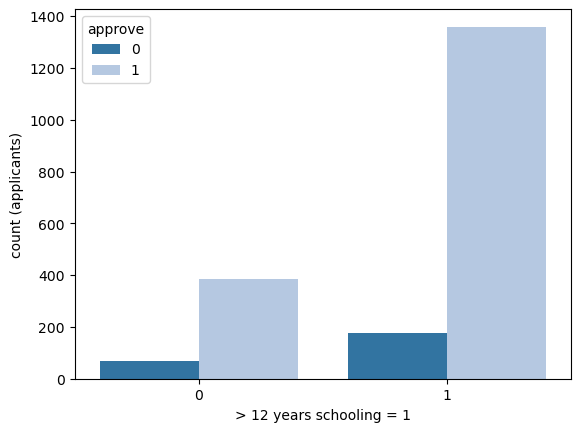

In [21]:
#sch
sns.countplot(x='sch', hue='approve', data=loanapp_df, palette='tab20')
plt.xlabel('> 12 years schooling = 1')
plt.ylabel('count (applicants)')
plt.show()

In [22]:
#Crosstab for white vs nonwhite
pd.crosstab(loanapp_df['white'], loanapp_df['approve'], normalize='index')

approve,0,1
white,,
0,0.292208,0.707792
1,0.091612,0.908388


In [23]:
pd.crosstab(loanapp_df['white'], loanapp_df['approve'])

approve,0,1
white,,
0,90,218
1,154,1527


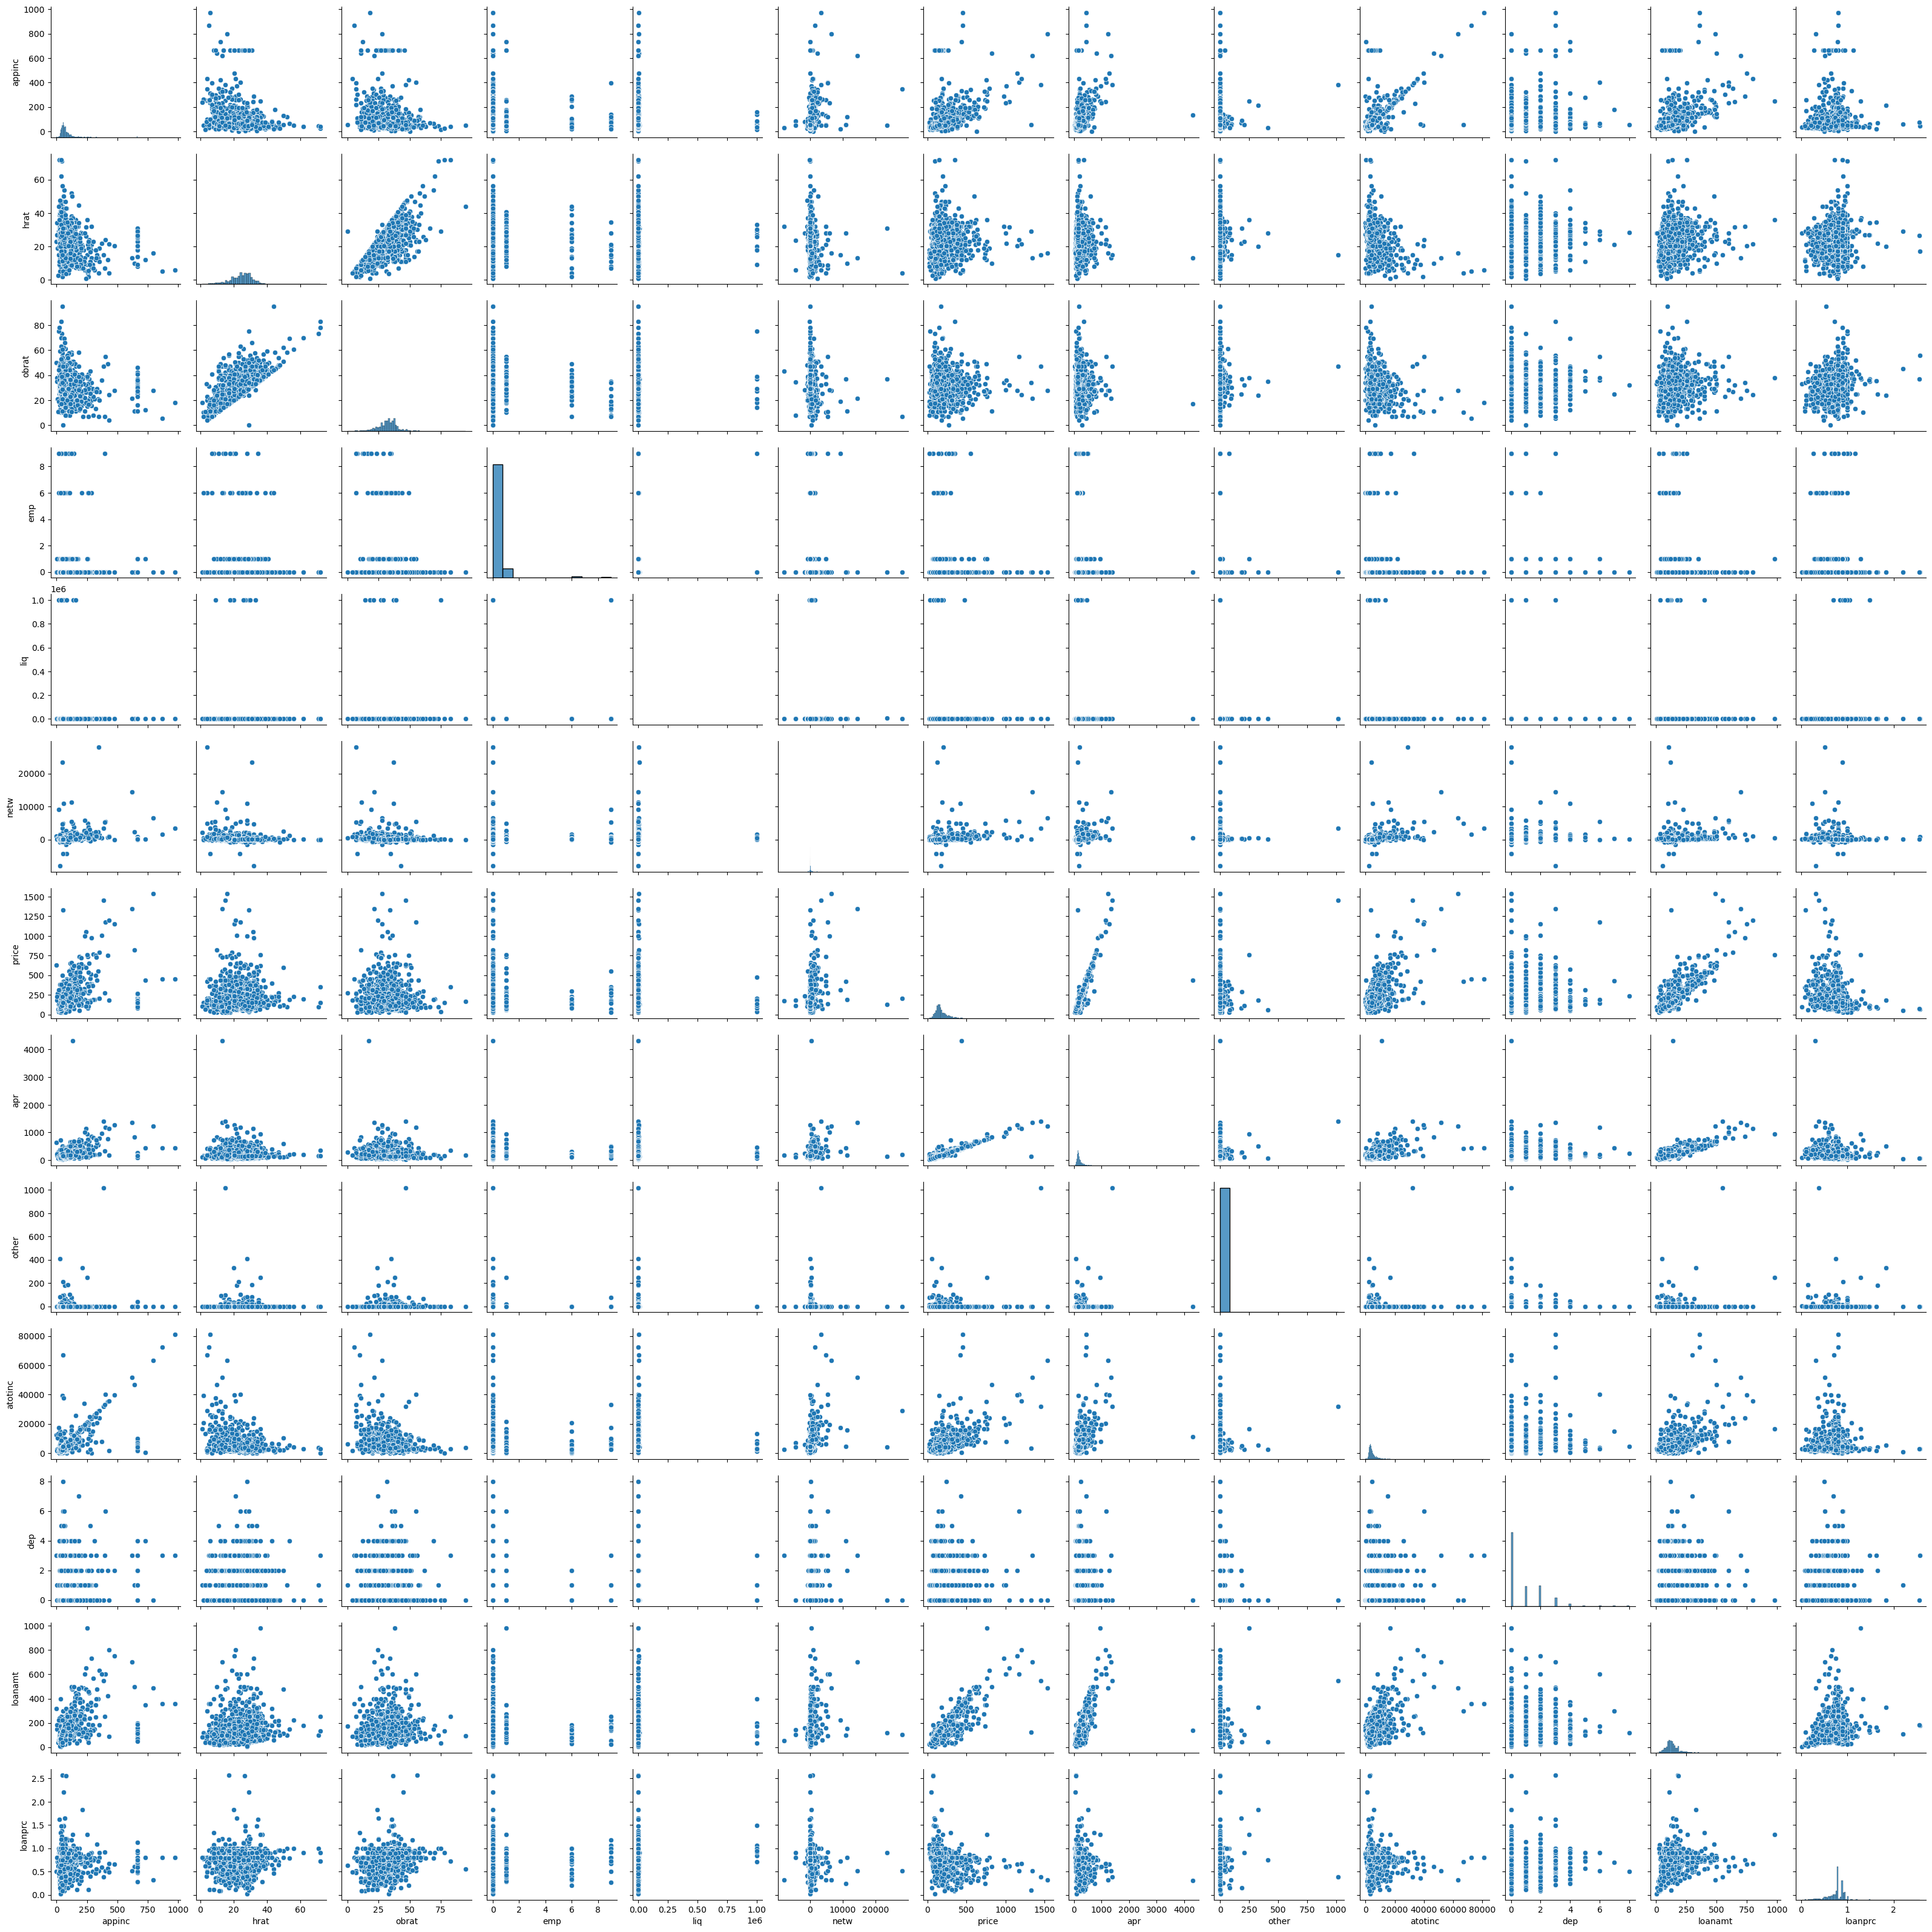

In [24]:
#pairplot
sns.pairplot(nbin_cols)

Approvals = 1745
Rejects = 244


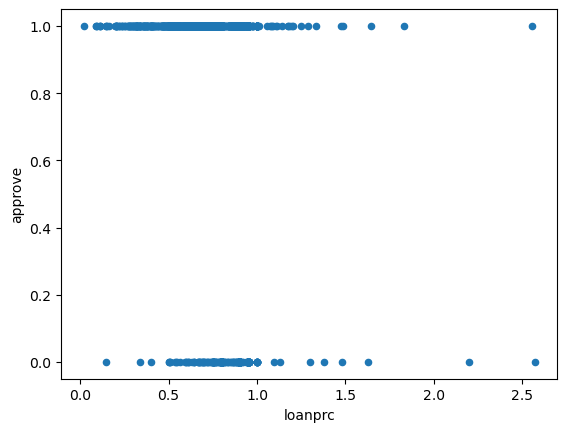

In [25]:
#Make a scatter plot of a random feature and approve
loanapp_df.plot('loanprc', 'approve', 'scatter')
loanapp_df

approve_sum = (loanapp_df['approve']==1).sum()
reject_sum = (loanapp_df['approve']==0).sum()

#Print the sum of approve vs. reject
print(f"Approvals = {approve_sum}")
print(f"Rejects = {reject_sum}")

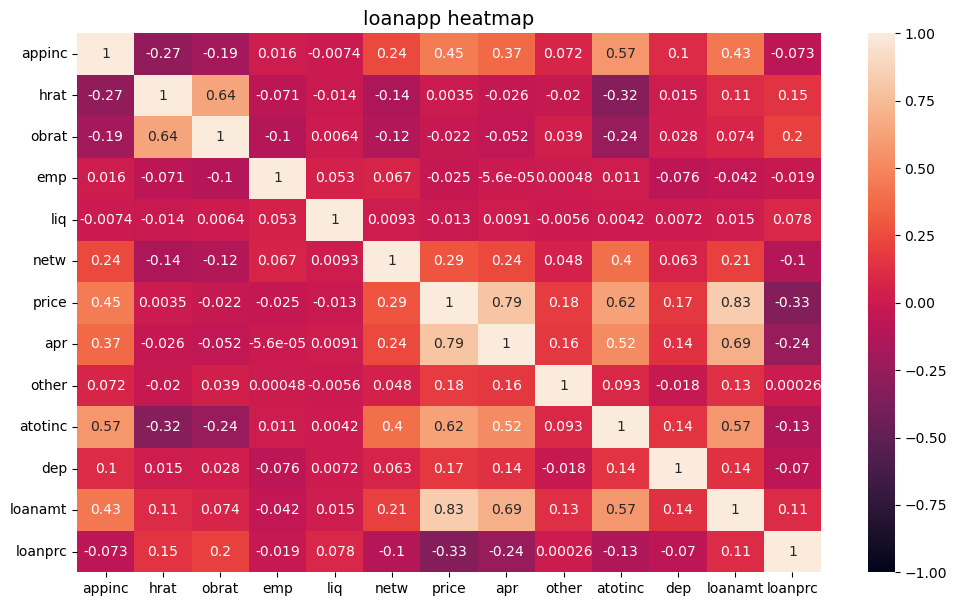

In [26]:
#heat map of the numerical attributes

plt.figure(figsize=(12, 7))
sns.heatmap(nbin_cols.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('loanapp heatmap', size=14)
plt.show()

## Classification Models

In [28]:
#count number of NaNs
loanapp_df.isna().sum()

approve      0
appinc       0
hrat         0
obrat        0
emp          0
self         0
liq          0
netw         0
price        0
apr          0
black        0
other        0
atotinc      0
dep          3
married      3
male        15
pubrec       0
sch          0
loanamt      0
loanprc      0
thick        9
multi        4
white        0
hispan       0
min30      183
old          0
dtype: int64

In [29]:
#Reference: Scikit learn SimpleImputer

#using SimpleImputer class to get rid of NaNs
imp = SimpleImputer(strategy="most_frequent")
loanapp_df = pd.DataFrame(imp.fit_transform(loanapp_df), columns=loanapp_df.columns)

In [30]:
loanapp_df[['male']]

,male
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1984,1.0
1985,1.0
1986,1.0
1987,1.0


In [31]:

#Prepping features, performing test train split (80-20)
X = loanapp_df.drop(['approve'], axis=1)
y = loanapp_df['approve']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1591, 25)
X_test shape: (398, 25)
y_train shape: (1591, 1)
y_test shape: (398, 1)


In [32]:
#reference: Shiksha Online Predicting Categorical Data Using Classification Algorithms
#reference link: https://www.shiksha.com/online-courses/articles/predicting-categorical-data-using-classification-algorithms/

#performing feature scaling to standardize the data
#to have a mean of 0 and standard deviation of 1

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
#create two dictionaries to store results of models
result_dict_train = {}
result_dict_test = {}

Test Accuracy: 0.6959798994974874
Evaluation Metrics for DECISION TREE
Train Accuracy: 1.0
Test Precision: 0.5455176767676767
Train Precision: 1.0
Test Recall: 0.5741884035602202
Train Recall: 1.0


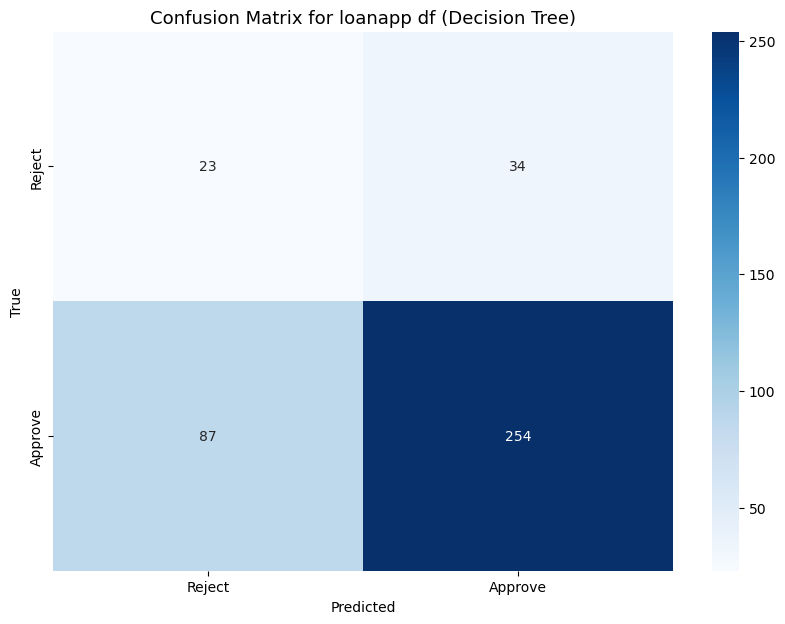

In [34]:
#binary classification model to predict approve vs. reject 
#use decision trees as a binary classification model 
dtree = DecisionTreeClassifier(random_state=42)

#train the model 
dtree.fit(X_train, y_train)

#test the model 
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["Decision Tree Test Accuracy"] = accuracy

y_pred_train = dtree.predict(X_train)

#evaluation metrics

print("Evaluation Metrics for DECISION TREE")

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["Decision Tree Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["Decision Tree Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["Decision Tree Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["Decision Tree Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["Decision Tree Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn
#in terms of actual class, 0 = reject and 1 = approve
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Decision Tree)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Evaluation Metrics for K NEAREST NEIGHBORS
Test Accuracy: 0.8492462311557789
Train Accuracy: 0.890634820867379
Test Precision: 0.6247752247752247
Train Precision: 0.7742248062015504
Test Recall: 0.5321294438442147
Train Recall: 0.5695244298185475


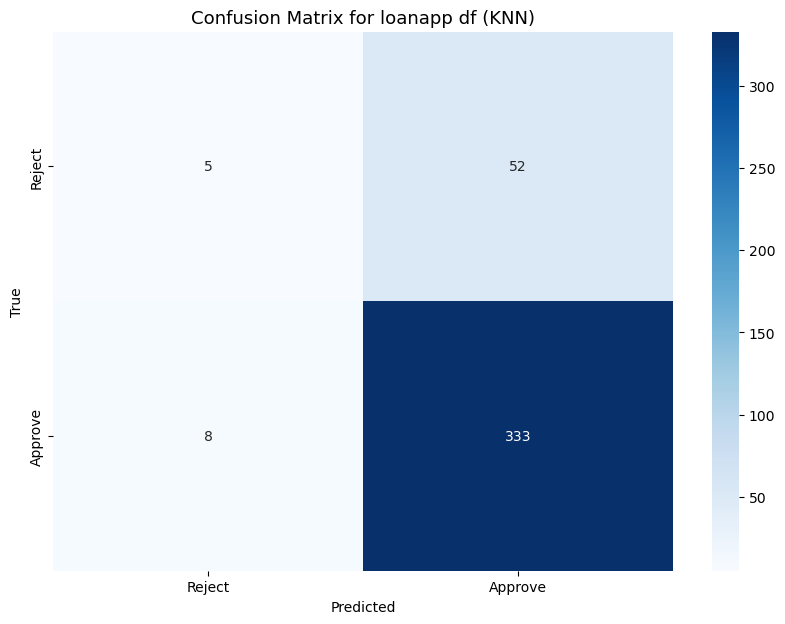

In [35]:
#use k nearest neighbors as a binary classification model
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

#train the model 
knn.fit(X_train, y_train)

#test the model 
y_pred = knn.predict(X_test)

print("Evaluation Metrics for K NEAREST NEIGHBORS")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["KNN Test Accuracy"] = accuracy

y_pred_train = knn.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["KNN Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["KNN Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["KNN Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["KNN Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["KNN Test Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (KNN)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluation Metrics for NAIVE BAYES
Test Accuracy: 0.7864321608040201
Train Accuracy: 0.7592708988057826
Test Precision: 0.6390038631346578
Train Precision: 0.5975649925475761
Test Recall: 0.7073365231259968
Train Recall: 0.6805079452138276


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


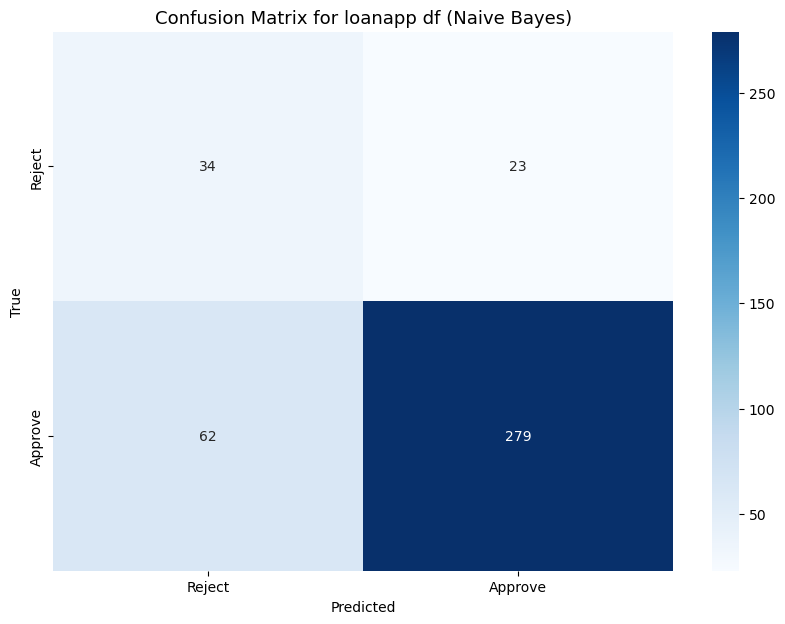

In [36]:
#use naive bayes as a binary classification model
nbayes = GaussianNB()

#train the model 
nbayes.fit(X_train, y_train)

#test the model 
y_pred = nbayes.predict(X_test)

print("Evaluation Metrics for NAIVE BAYES")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["Naive Bayes Test Accuracy"] = accuracy

y_pred_train = nbayes.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["Naive Bayes Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["Naive Bayes Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["Naive Bayes Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["Naive Bayes Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["Naive Bayes Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Naive Bayes)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluation Metrics for LOGISTIC REGRESSION
Test Accuracy: 0.8693467336683417
Train Accuracy: 0.8881206788183532
Test Precision: 0.7719756309834639
Train Precision: 0.7526199842643588
Test Recall: 0.5803879199464939
Train Recall: 0.5611469140880906


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


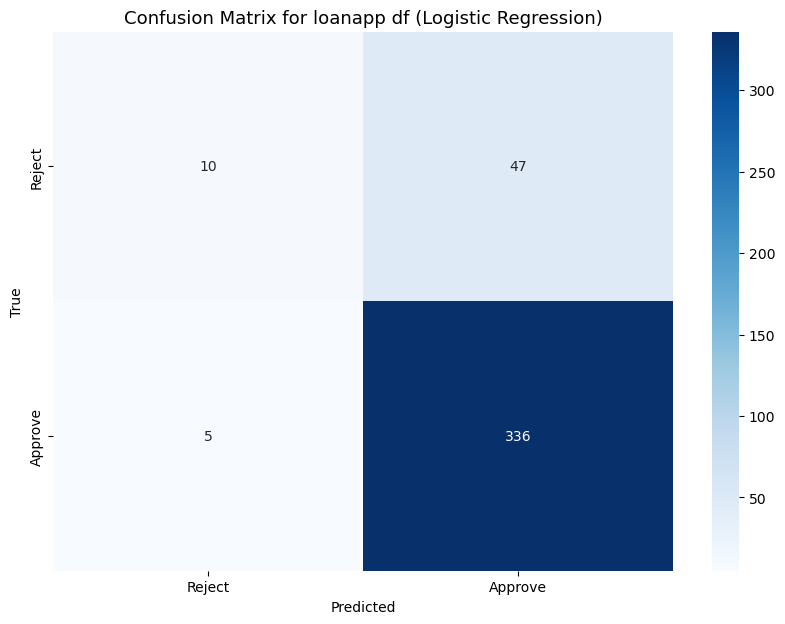

In [37]:
#use logistic regression as a binary classification model
lreg = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

#train the model 
lreg.fit(X_train, y_train)

#test the model 
y_pred = lreg.predict(X_test)

print("Evaluation Metrics for LOGISTIC REGRESSION")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["Logistic Regression Test Accuracy"] = accuracy

y_pred_train = lreg.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["Logistic Regression Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["Logistic Regression Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["Logistic Regression Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["Logistic Regression Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["Logistic Regression Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred) 

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Logistic Regression)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluation Metrics for SUPPORT VECTOR MACHINES
Test Accuracy: 0.8567839195979899
Train Accuracy: 0.8824638592080453
Test Precision: 0.42839195979899497
Train Precision: 0.44123192960402263
Test Recall: 0.5
Train Recall: 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


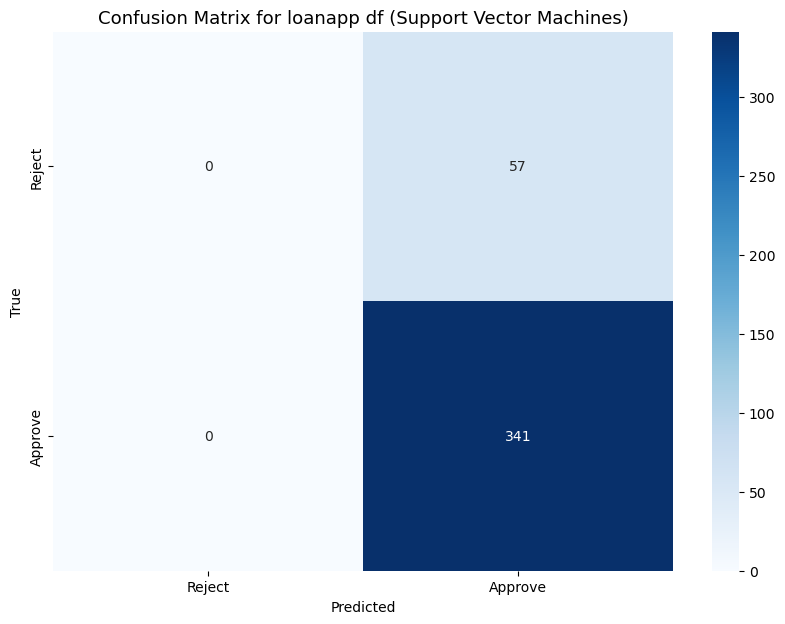

In [38]:
#use support vector machines as a binary classification model
svm = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

#train the model 
svm.fit(X_train, y_train)

#test the model 
y_pred = svm.predict(X_test)

print("Evaluation Metrics for SUPPORT VECTOR MACHINES")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["SVM Test Accuracy"] = accuracy

y_pred_train = svm.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["SVM Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["SVM Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["SVM Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["SVM Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["SVM Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Support Vector Machines)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluation Metrics for RANDOM FOREST
Test Accuracy: 0.8844221105527639
Train Accuracy: 1.0
Test Precision: 0.8758920800696257
Train Precision: 1.0
Test Recall: 0.6111025363996502
Train Recall: 1.0


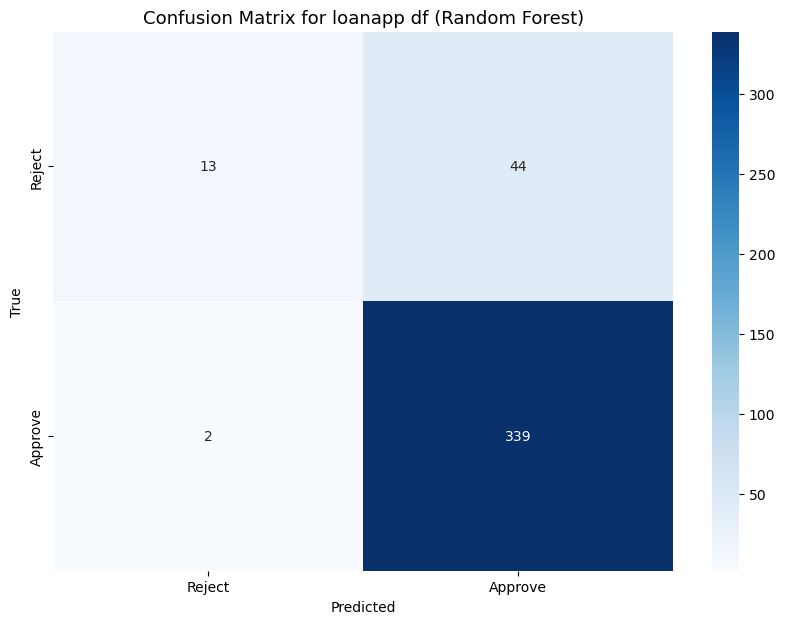

In [39]:
#use random forests as a binary classification model 
rforest = RandomForestClassifier(random_state=42)

#train the model 
rforest.fit(X_train, y_train.ravel())

#test the model 
y_pred = rforest.predict(X_test)

print("Evaluation Metrics for RANDOM FOREST")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["Random Forest Test Accuracy"] = accuracy

y_pred_train = rforest.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["Random Forest Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["Random Forest Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["Random Forest Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["Random Forest Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["Random Forest Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Random Forest)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Metrics for Adaboost
Test Accuracy: 0.592964824120603
Train Accuracy: 0.9220615964802011
Test Precision: 0.5576898548506416
Train Precision: 0.8735681208871557
Test Recall: 0.6163502598137574
Train Recall: 0.7101672836966955


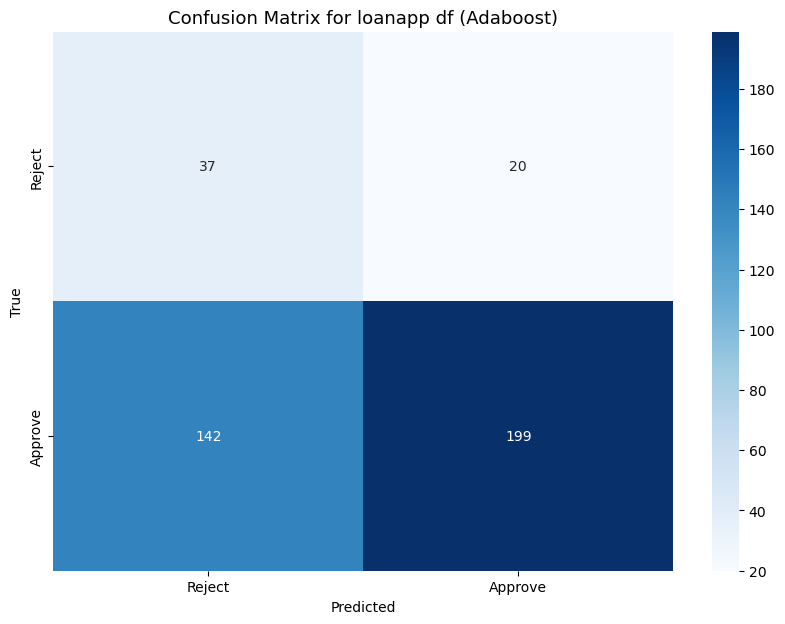

In [40]:
#use random forests as a binary classification model 
ada = AdaBoostClassifier(n_estimators=200, random_state=42)

#train the model 
ada.fit(X_train, y_train)

#test the model 
y_pred = ada.predict(X_test)

print("Evaluation Metrics for Adaboost")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
result_dict_test["Adaboost Test Accuracy"] = accuracy

y_pred_train = ada.predict(X_train)

#evaluation metrics

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")
result_dict_train["Adaboost Train Accuracy"] = accuracy

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Test Precision: {precision}")
result_dict_test["Adaboost Test Precision"] = precision

precision = precision_score(y_train, y_pred_train, average='macro') 
print(f"Train Precision: {precision}")
result_dict_train["Adaboost Train Precision"] = precision

recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall: {recall}")
result_dict_test["Adaboost Test Recall"] = recall

recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Train Recall: {recall}")
result_dict_train["Adaboost Train Recall"] = recall

#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#drawing confusion matrix using Seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix for loanapp df (Adaboost)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
#printing evluation metric dictionaries

df_result_train = pd.DataFrame.from_dict(result_dict_train, orient = "index", columns=["Score"])
df_result_train

,Score
Decision Tree Train Accuracy,1.000000
Decision Tree Train Precision,1.000000
Decision Tree Train Recall,1.000000
KNN Train Accuracy,0.890635
KNN Train Precision,0.774225
KNN Test Recall,0.569524
Naive Bayes Train Accuracy,0.759271
Naive Bayes Train Precision,0.597565
Naive Bayes Train Recall,0.680508
Logistic Regression Train Accuracy,0.888121


In [42]:
#printing evluation metric dictionaries

df_result_test = pd.DataFrame.from_dict(result_dict_test, orient = "index", columns=["Score"])
df_result_test

,Score
Decision Tree Test Accuracy,0.695980
Decision Tree Test Precision,0.545518
Decision Tree Test Recall,0.574188
KNN Test Accuracy,0.849246
KNN Test Precision,0.624775
KNN Test Recall,0.532129
Naive Bayes Test Accuracy,0.786432
Naive Bayes Test Precision,0.639004
Naive Bayes Test Recall,0.707337
Logistic Regression Test Accuracy,0.869347


## Feature Importance

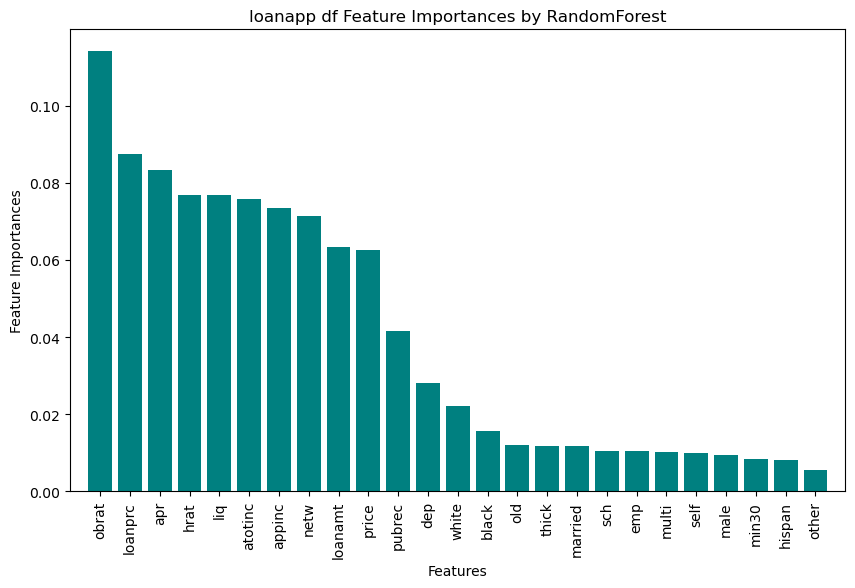

In [43]:
#Reference: SML 312 Precept 7
# Visualize feature importance
feature_importances = rforest.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('loanapp df Feature Importances by RandomForest')
plt.bar(range(len(indices)), feature_importances[indices], color='teal', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.show()

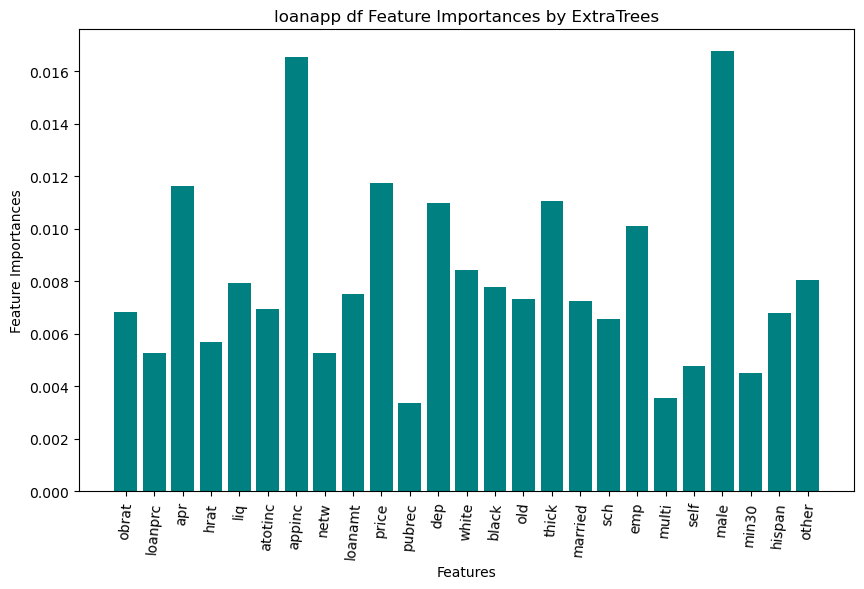

In [44]:
#Reference: ML | Extra Tree Classifier for Feature Selection
#Reference link: https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
 
# Training the model
extra_tree_forest.fit(X_train, y_train.ravel())
 
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
 
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
indices = np.argsort(feature_importances)[::-1]
features = X.columns

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)),feature_importance_normalized, color='teal')
plt.title('loanapp df Feature Importances by ExtraTrees')
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=85)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.592964824120603


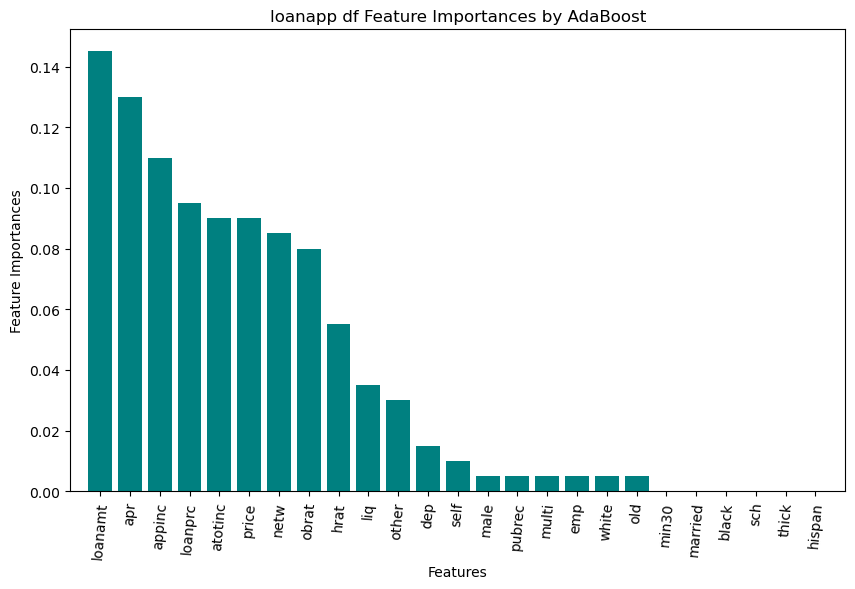

In [45]:
#Reference: SML 312 Precept 7 notes
#use adapost to visualize feature importance

# Train the AdaBoost model
ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(X_train, y_train)
y_ada_pred = ada.predict(X_test)

# Calculate accuracy
ada_accuracy = accuracy_score(y_test, y_ada_pred)
print(f"Test Accuracy: {ada_accuracy}")
result_dict_test["Adaboost Test Accuracy"] = ada_accuracy

# Visualize feature importance
feature_importances = ada.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('loanapp df Feature Importances by AdaBoost')
plt.bar(range(len(indices)), feature_importances[indices], color='teal', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=85)
plt.xlim([-1, len(indices)])
plt.xlabel("Features")
plt.ylabel('Feature Importances')
plt.show()

In [46]:
#Reference: Feature importance
#reference link: https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

#calculate RidgeCV scores
ridgecv =  make_pipeline(StandardScaler(), RidgeCV())
features = X.columns

ridgecv.fit(X_train, y_train)

print(f"RidgeCV score on training data: {ridgecv.score(X_train, y_train)}")
print(f"RidgeCV score on testing data: {ridgecv.score(X_test, y_test)}")

RidgeCV score on training data: 0.13797668313604172
RidgeCV score on testing data: 0.17968717656733135


## Comparing Evaluation Metrics

In [47]:
#compare accuracy scores from dictionaries
df_result_train = pd.DataFrame.from_dict(result_dict_train, orient = "index", columns=["Score"])
df_result_train

,Score
Decision Tree Train Accuracy,1.000000
Decision Tree Train Precision,1.000000
Decision Tree Train Recall,1.000000
KNN Train Accuracy,0.890635
KNN Train Precision,0.774225
KNN Test Recall,0.569524
Naive Bayes Train Accuracy,0.759271
Naive Bayes Train Precision,0.597565
Naive Bayes Train Recall,0.680508
Logistic Regression Train Accuracy,0.888121


In [48]:
df_result_test = pd.DataFrame.from_dict(result_dict_test, orient = "index", columns=["Score"])
df_result_test

,Score
Decision Tree Test Accuracy,0.695980
Decision Tree Test Precision,0.545518
Decision Tree Test Recall,0.574188
KNN Test Accuracy,0.849246
KNN Test Precision,0.624775
KNN Test Recall,0.532129
Naive Bayes Test Accuracy,0.786432
Naive Bayes Test Precision,0.639004
Naive Bayes Test Recall,0.707337
Logistic Regression Test Accuracy,0.869347


/var/folders/8p/c80z8x8j4fv_svp6cjh_6h7m0000gn/T/ipykernel_1117/4258292084.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result_train_plot.set_xticklabels(df_result_train.index, rotation = 85)


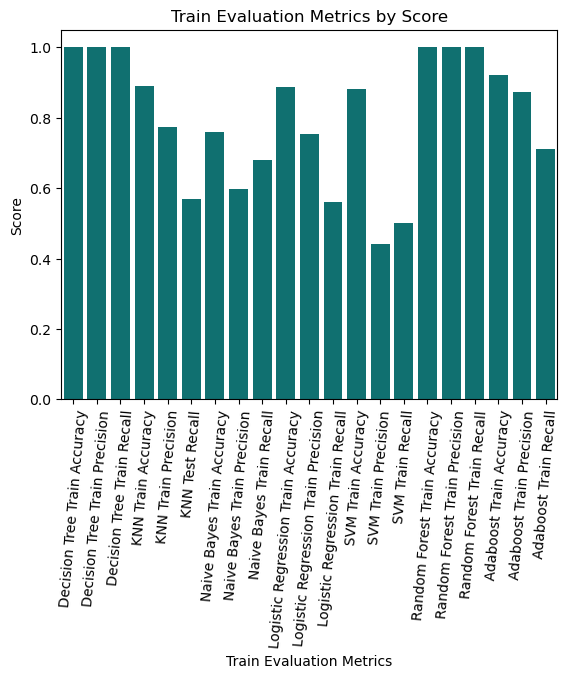

/var/folders/8p/c80z8x8j4fv_svp6cjh_6h7m0000gn/T/ipykernel_1117/4258292084.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result_test_plot.set_xticklabels(df_result_test.index, rotation = 85)


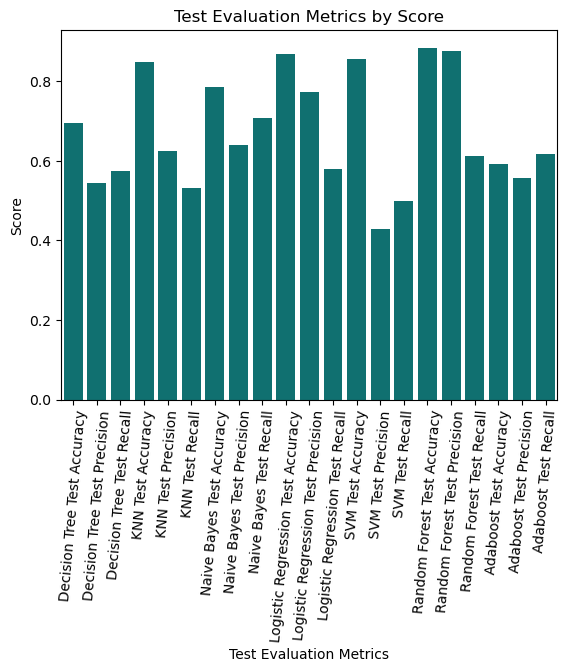

In [49]:
result_train_plot = sns.barplot(x = df_result_train.index, y = df_result_train.Score, color = 'teal') 
result_train_plot.set_xticklabels(df_result_train.index, rotation = 85)
plt.title("Train Evaluation Metrics by Score")
plt.xlabel("Train Evaluation Metrics")
plt.show()
result_test_plot = sns.barplot(x = df_result_test.index, y = df_result_test.Score, color = 'teal') 
result_test_plot.set_xticklabels(df_result_test.index, rotation = 85)
plt.title("Test Evaluation Metrics by Score")
plt.xlabel("Test Evaluation Metrics")
plt.show()

## ROC Curves

In [50]:
print(X_train)

[[-5.03753631e-02 -5.19984324e-01 -3.90008525e-01 ... -2.39045722e-01
  -2.27053310e-01 -9.26630919e-01]
 [-5.32986489e-03  1.04553622e+00  5.71380893e-01 ... -2.39045722e-01
  -2.27053310e-01  1.07917832e+00]
 [ 6.52626738e+00 -9.46944472e-01  3.31033538e-01 ... -2.39045722e-01
  -2.27053310e-01  1.07917832e+00]
 ...
 [ 3.21249997e-01  6.59996754e-03  6.66513569e-02 ...  4.18330013e+00
  -2.27053310e-01  1.07917832e+00]
 [ 1.52329379e-01 -2.65478506e+00 -2.55313471e+00 ... -2.39045722e-01
  -2.27053310e-01  1.07917832e+00]
 [-1.74250483e-01  5.90111953e-01 -1.13609159e-01 ... -2.39045722e-01
  -2.27053310e-01 -9.26630919e-01]]


In [51]:
print(X_test)

[[ 0.09470208 -0.8514175  -1.62256573 ... -0.25889019 -0.25889019
  -0.98009751]
 [ 0.46088344  1.16306504  0.75558716 ... -0.25889019 -0.25889019
   1.02030664]
 [ 0.66291453 -0.04562449 -0.12057443 ... -0.25889019 -0.25889019
   1.02030664]
 ...
 [-0.10732902 -0.47538087 -1.13441861 ... -0.25889019 -0.25889019
   1.02030664]
 [-0.43562955  0.7870284  -0.14560771 ... -0.25889019 -0.25889019
   1.02030664]
 [-0.334614   -0.01607884 -0.6212382  ... -0.25889019 -0.25889019
  -0.98009751]]


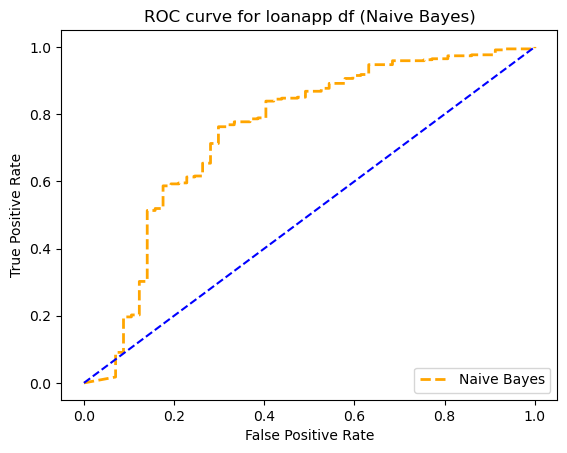

In [56]:
#references: SciKit Learn Receiver Operating Characteristic (ROC) example page and Analytics Vidhya guide
#reference link 1: https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html
#reference link 2: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

#use Naive Bayes classifier to train and predict probabilities
nbayes.fit(X_train, y_train.ravel())
predict_prob = nbayes.predict_proba(X_test)

# Calculate the ROC curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',lw=2, color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [57]:
#finding area under this Naive Bayes ROC curve

# auc scores
auc_score1 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for Naive Bayes = {auc_score1}")

AUC score for Naive Bayes = 0.7480578278540928


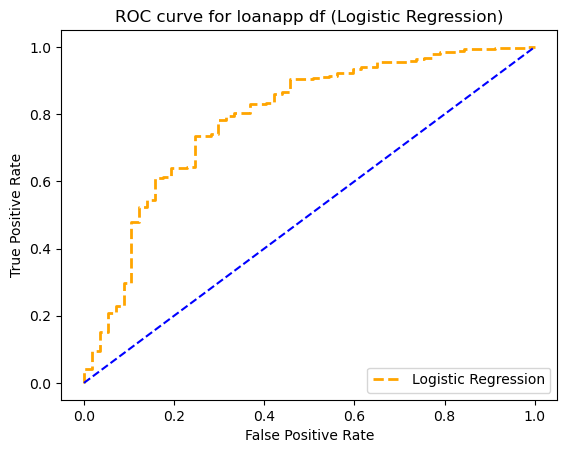

In [58]:
#use Logistic Regression classifier to train and predict probabilities
lreg.fit(X_train, y_train.ravel())
predict_prob = lreg.predict_proba(X_test)

# Calculate the ROC curve for model
fpr2, tpr2, thresh2 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',lw=2, color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [59]:
#finding area under this ROC curve

# auc scores
auc_score2 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for Logistic Regression = {auc_score2}")

AUC score for Logistic Regression = 0.7903483047795441


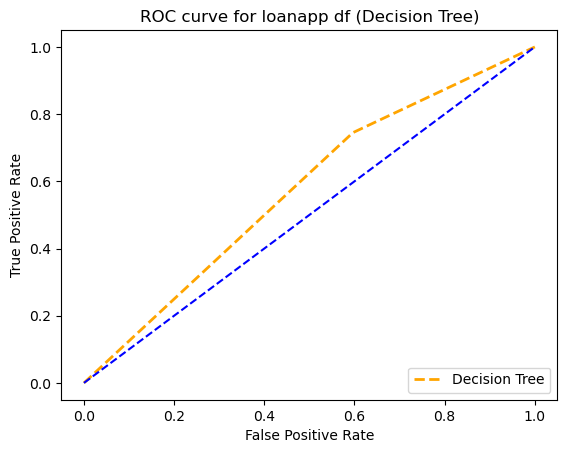

In [60]:
#use Decision Tree classifier to train and predict probabilities
dtree.fit(X_train, y_train)
predict_prob = dtree.predict_proba(X_test)

# Calculate the ROC curve for random forest model
fpr3, tpr3, thresh3 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',lw=2, color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [61]:
#finding area under this ROC curve

# auc scores
auc_score3 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for Decision Tree = {auc_score3}")

AUC score for Decision Tree = 0.5741884035602202


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


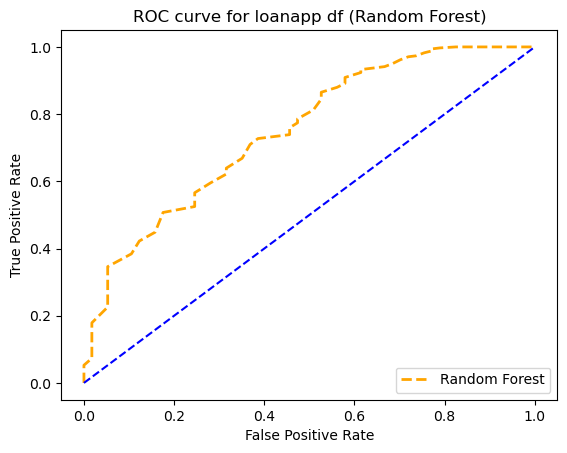

In [62]:
#use Random Forest classifier to train and predict probabilities
rforest.fit(X_train, y_train)
predict_prob = rforest.predict_proba(X_test)

# Calculate the ROC curve for model
fpr4, tpr4, thres4 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',lw=2, color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [63]:
#finding area under this ROC curve

# auc scores
auc_score4 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for Random Forest = {auc_score4}")

AUC score for Random Forest = 0.7485980346761332


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


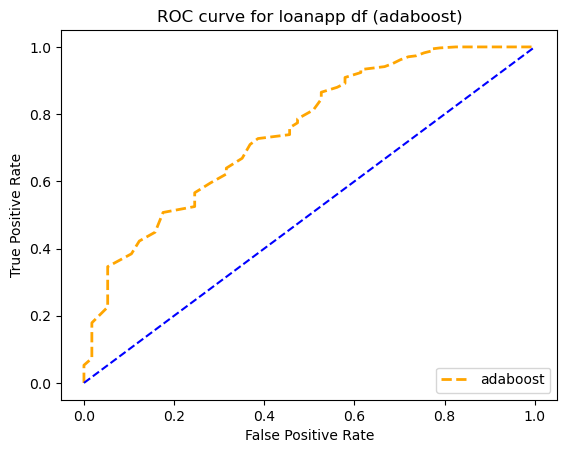

In [64]:
#use adaboost classifier to train and predict probabilities
ada.fit(X_train, y_train)
predict_prob = ada.predict_proba(X_test)

# Calculate the ROC curve for model
fpr5, tpr5, thres5 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',lw=2, color='orange', label='adaboost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (adaboost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [65]:
#finding area under this ROC curve

# auc scores
auc_score5 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for adaboost = {auc_score5}")

AUC score for adaboost = 0.637083912126357


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


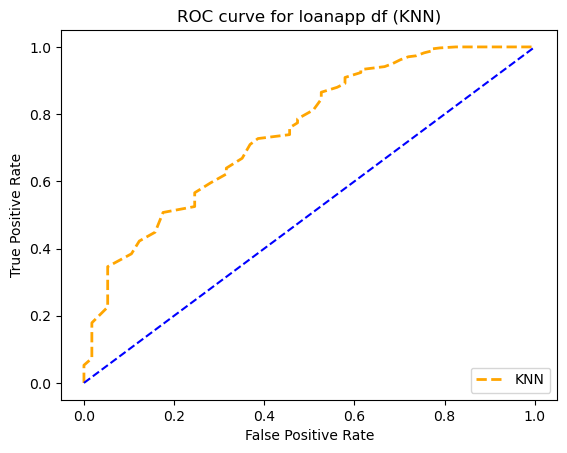

In [66]:
#use knn classifier to train and predict probabilities
knn.fit(X_train, y_train)
predict_prob = knn.predict_proba(X_test)

# Calculate the ROC curve for model
fpr6, tpr6, thres6 = roc_curve(y_test, predict_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',lw=2, color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for loanapp df (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [67]:
# auc scores
auc_score6 = roc_auc_score(y_test, predict_prob[:,1])

print(f"AUC score for KNN = {auc_score6}")

AUC score for KNN = 0.5983690898801255


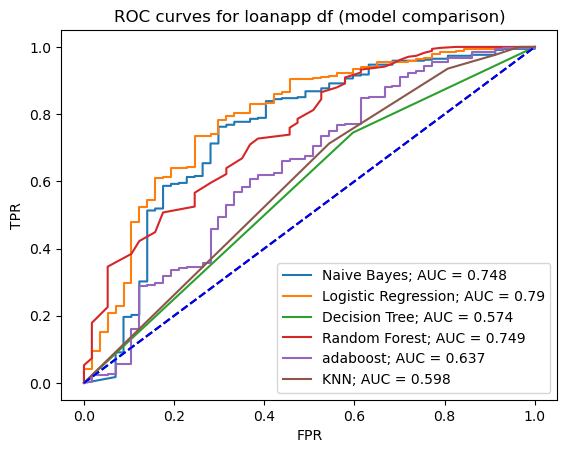

In [68]:
#All ROC curves on one plot for paper
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"Naive Bayes; AUC = {round(auc_score1, 3)}")
plt.plot(fpr2, tpr2, label= f"Logistic Regression; AUC = {round(auc_score2, 3)}")
plt.plot(fpr3, tpr3, label= f"Decision Tree; AUC = {round(auc_score3, 3)}")
plt.plot(fpr4, tpr4, label= f"Random Forest; AUC = {round(auc_score4, 3)}")
plt.plot(fpr5, tpr5, label= f"adaboost; AUC = {round(auc_score5, 3)}")
plt.plot(fpr6, tpr6, label= f"KNN; AUC = {round(auc_score6, 3)}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curves for loanapp df (model comparison)')
plt.show()

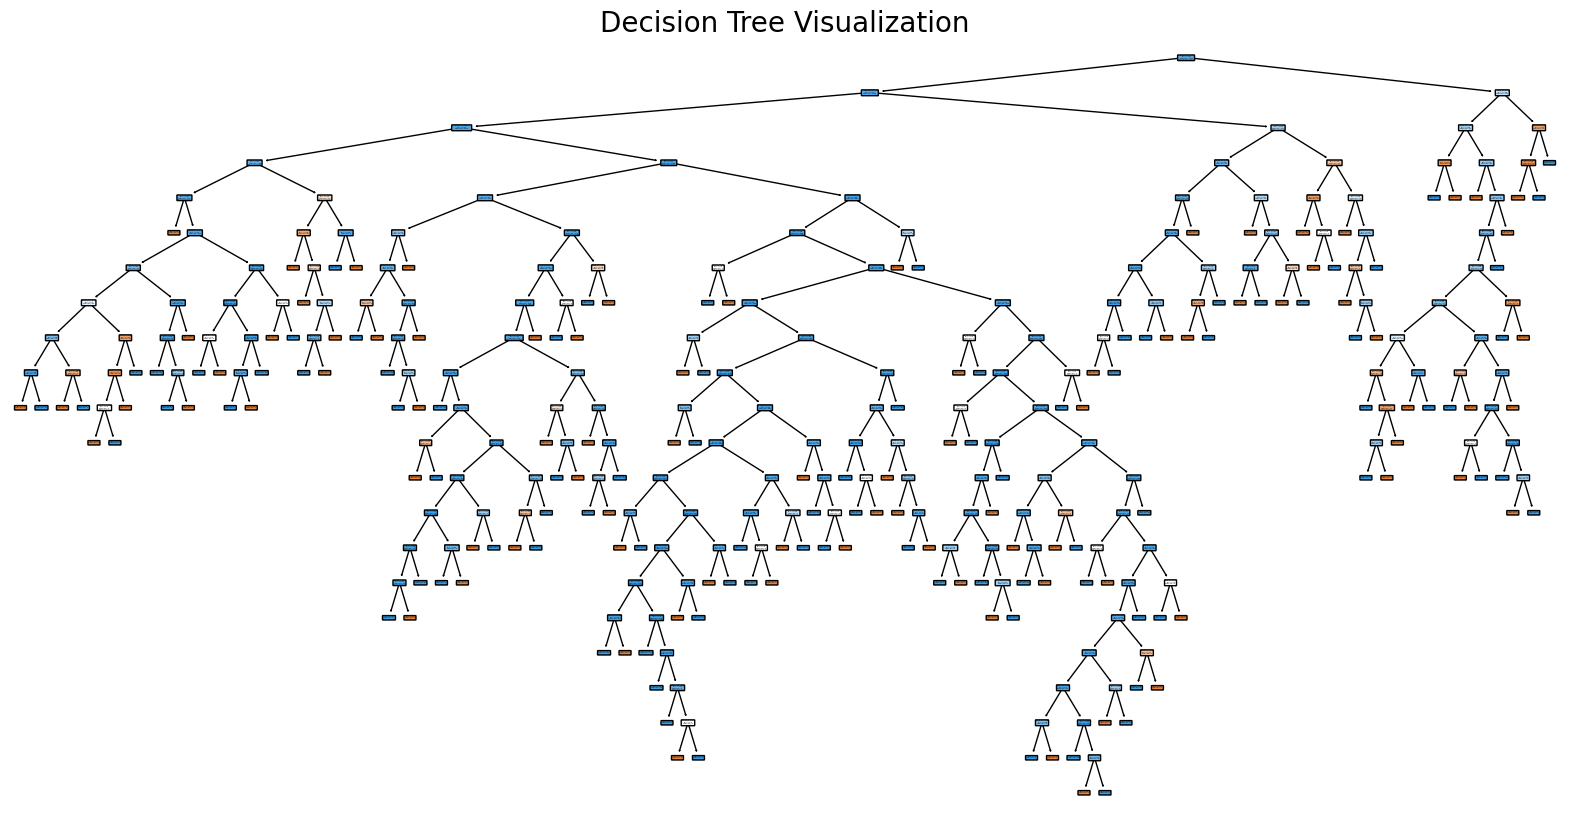

In [69]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, rounded=True, proportion=False, precision=2)
plt.title('Decision Tree Visualization', fontsize=20)
#plt.savefig("Visualization_high_res.png", format='png', dpi=300) 
plt.show()

## Fairlearn for white vs. non-white

In [185]:
#reference: all below is adapted from Fairlearn example notebooks: Credit Loan Decisions
#reference link: https://fairlearn.org/main/auto_examples/plot_credit_loan_decisions.html#footcite-dudik2020assessing

In [186]:
#installing fairlearn packages and addl packages needed
from fairlearn.metrics import (
    MetricFrame,
    count,
    equalized_odds_difference,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score
from fairlearn.reductions import EqualizedOdds, ExponentiatedGradient
from sklearn.pipeline import Pipeline
import lightgbm as lgb

rand_seed = 1234
np.random.seed(rand_seed)

In [187]:
# setting outcome variable as approve and sensitive variable as white
Y, A = loanapp_df.loc[:, "approve"], loanapp_df.loc[:, "white"]
X = pd.get_dummies(loanapp_df.drop(columns=["approve", "white"]))

In [188]:
#checking proportions of variables
print(loanapp_df['white'].value_counts(normalize=True))
print(loanapp_df['male'].value_counts(normalize=True))
print(loanapp_df['approve'].value_counts(normalize=True))
#imbalanced, so we will use balanced accuracy later



white
1.0    0.845148
0.0    0.154852
Name: proportion, dtype: float64
male
1.0    0.81448
0.0    0.18552
Name: proportion, dtype: float64
approve
1.0    0.877325
0.0    0.122675
Name: proportion, dtype: float64


In [189]:
   # down sampling of majority class in training dataset
   # so that there is a balanced dataset between approve and reject outcome variables
   # A_train is the training split of the sensitive feature

def resample_training_data(X_train, Y_train, A_train):
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids]
    return X_train, Y_train, A_train

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.35, stratify=Y
)

X_train, y_train, A_train = resample_training_data(X_train, y_train, A_train)

In [190]:
#training gradient-boosted tree classifier using lightgbm package
lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.03,
    "num_leaves": 10,
    "max_depth": 3,
    "random_state": rand_seed,
    "n_jobs": 1,
    "verbose": -1,
}

estimator = Pipeline(
    steps=[
        ("preprocessing", StandardScaler()),
        ("classifier", lgb.LGBMClassifier(**lgb_params)),
    ]
)

estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 LGBMClassifier(learning_rate=0.03, max_depth=3, metric='auc',
                                n_jobs=1, num_leaves=10, objective='binary',
                                random_state=1234, verbose=-1))])

In [191]:
Y_pred_proba = estimator.predict_proba(X_test)[:, 1]
Y_pred = estimator.predict(X_test)

roc_auc_score(y_test, Y_pred_proba)



0.762474783998782

In [192]:
# computes the standard error of metrics based on normal dist assumption
# returns the standard error of metric
def compute_error_metric(metric_value, sample_size):
    metric_value = metric_value / sample_size
    return 1.96 * np.sqrt(metric_value * (1.0 - metric_value)) / np.sqrt(sample_size)


def false_positive_error(y_true, y_pred):
    """Compute the standard error for the false positive rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fp, tn + fp)


def false_negative_error(y_true, y_pred):
    """Compute the standard error for the false negative rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fn, fn + tp)


def balanced_accuracy_error(y_true, y_pred):
    """Compute the standard error for the balanced accuracy estimate."""
    fpr_error, fnr_error = false_positive_error(y_true, y_pred), false_negative_error(
        y_true, y_pred
    )
    return np.sqrt(fnr_error**2 + fpr_error**2) / 2


fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "balanced_acc_error": balanced_accuracy_error,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_positive_error": false_positive_error,
    "false_negative_rate": false_negative_rate,
    "false_negative_error": false_negative_error,
}

In [193]:
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]

In [194]:

metricframe_unmitigated = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=Y_pred,
    sensitive_features=A_test,
)

metricframe_unmitigated.by_group[metrics_to_report]

metricframe_unmitigated.difference()[metrics_to_report]

metricframe_unmitigated.overall[metrics_to_report]

balanced_accuracy      0.705591
false_positive_rate    0.418605
false_negative_rate    0.170213
dtype: float64

In [195]:
#plot disaggregated metrics with associated error bar

def plot_group_metrics_with_error_bars(metricframe, metric, error_name):

    grouped_metrics = metricframe.by_group
    point_estimates = grouped_metrics[metric]
    error_bars = grouped_metrics[error_name]
    lower_bounds = point_estimates - error_bars
    upper_bounds = point_estimates + error_bars

    x_axis_names = [str(name) for name in error_bars.index.to_flat_index().tolist()]
    plt.vlines(
        x_axis_names,
        lower_bounds,
        upper_bounds,
        linestyles="dashed",
        alpha=0.45,
    )
    plt.scatter(x_axis_names, point_estimates, s=25)
    plt.xticks(rotation=0)
    y_start, y_end = np.round(min(lower_bounds), decimals=2), np.round(
        max(upper_bounds), decimals=2
    )
    plt.yticks(np.arange(y_start, y_end, 0.05))
    plt.ylabel(metric)
    plt.xlabel('white = 1')

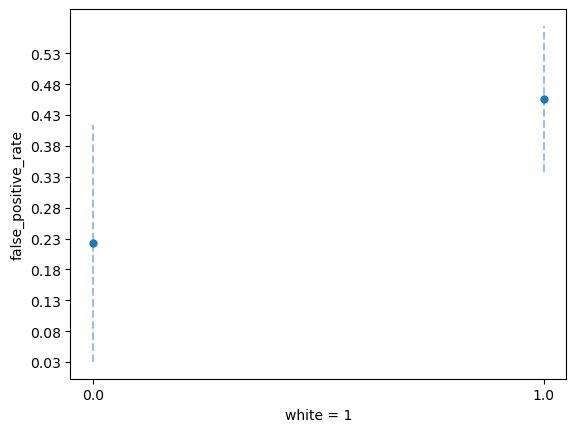

In [183]:
plot_group_metrics_with_error_bars(
    metricframe_unmitigated, "false_positive_rate", "false_positive_error"
)

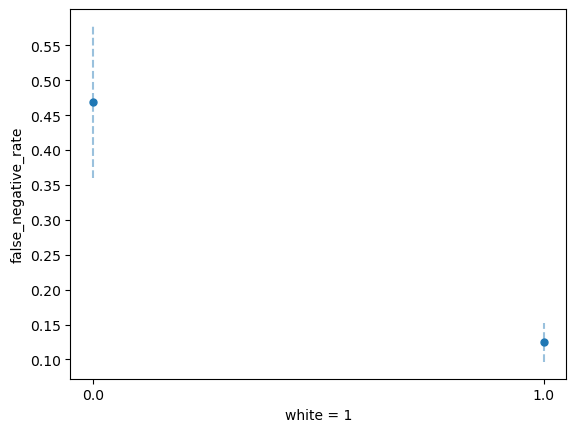

In [196]:
plot_group_metrics_with_error_bars(
    metricframe_unmitigated, "false_negative_rate", "false_negative_error"
)

array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='white'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='white'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='white'>]],
      dtype=object)

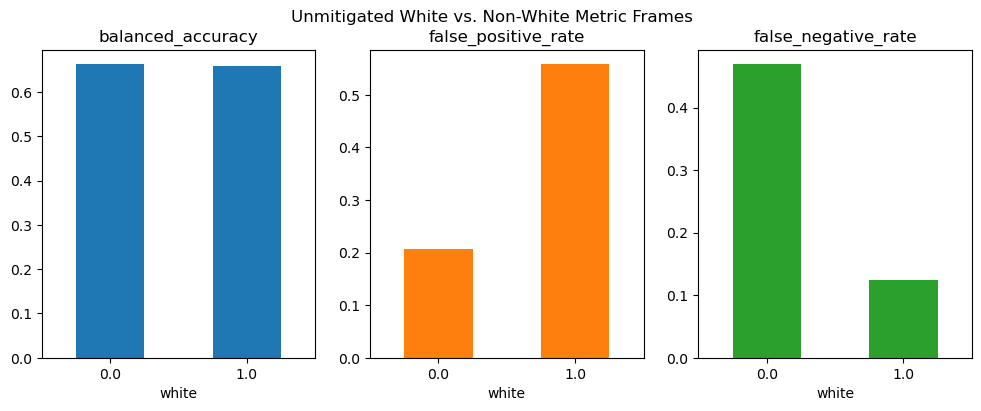

In [197]:
metricframe_unmitigated.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0, 
    title="Unmitigated White vs. Non-White Metric Frames", 
)


In [198]:
#computing equlaized odds difference for the model 
#(maximum of false positive rate difference and false negative rate difference)
#minimize both because false positives and false negatives lead to harms
balanced_accuracy_unmitigated = balanced_accuracy_score(y_test, Y_pred)
equalized_odds_unmitigated = equalized_odds_difference(y_test, Y_pred, sensitive_features=A_test)
print(f" Balanced accuracy unmitigated = {balanced_accuracy_unmitigated}")
print(f" Equalized odds unmitigated = {equalized_odds_unmitigated}")

 Balanced accuracy unmitigated = 0.7055912914398812
 Equalized odds unmitigated = 0.35180995475113125


In [199]:
#threshold optimizer takes in existing ML model and predictions are scoring function
#scoring function identifies different thresholds for sensitive feature groups
#optimizes balanced accuracy subject to equalized odds fairness constraint
#balanced accuracy score optimizes the false positive rate and false negative rate at the same time
postprocess_est = ThresholdOptimizer(
    estimator=estimator,
    constraints="equalized_odds",  
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)

In [200]:
postprocess_est.fit(X=X_train, y=y_train, sensitive_features=A_train)

postprocess_pred = postprocess_est.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba = postprocess_est._pmf_predict(X_test, sensitive_features=A_test)

In [201]:
#compare the MetricFrame results
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):

    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [202]:
bal_acc_postprocess = balanced_accuracy_score(y_test, postprocess_pred)
eq_odds_postprocess = equalized_odds_difference(
    y_test, postprocess_pred, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]

balanced_accuracy      0.043355
false_positive_rate    0.097285
false_negative_rate    0.010575
dtype: float64

array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='white'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='white'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='white'>]],
      dtype=object)

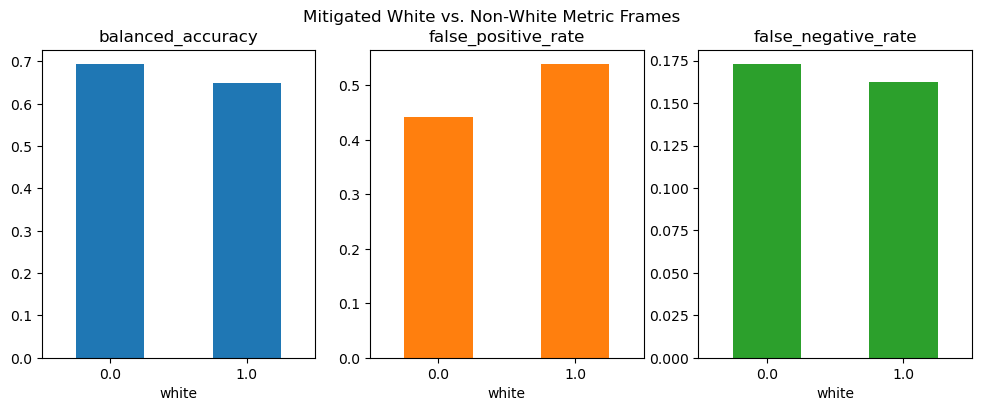

In [203]:
#compare threshold classifer result with unmitigated model
compare_metricframe_results(
    metricframe_unmitigated,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)

metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0, title="Mitigated White vs. Non-White Metric Frames", 
)

## Fairlearn for male vs. female

In [204]:
#installing fairlearn packages and addl packages needed
from fairlearn.metrics import (
    MetricFrame,
    count,
    equalized_odds_difference,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score
from fairlearn.reductions import EqualizedOdds, ExponentiatedGradient
from sklearn.pipeline import Pipeline
import lightgbm as lgb

rand_seed = 1234
np.random.seed(rand_seed)

In [205]:
# setting outcome variable as approve and sensitive variable as male
Y, A = loanapp_df.loc[:, "approve"], loanapp_df.loc[:, "male"]
X = pd.get_dummies(loanapp_df.drop(columns=["approve", "male"]))

In [206]:
   # down sampling of majority class in training dataset
   # so that there is a balanced dataset between approve and reject outcome variables
   # A_train is the training split of the sensitive feature

def resample_training_data(X_train, Y_train, A_train):
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids]
    return X_train, Y_train, A_train

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.35, stratify=Y
)

X_train, y_train, A_train = resample_training_data(X_train, y_train, A_train)


In [207]:
#training gradient-boosted tree classifier using lightgbm package
lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.03,
    "num_leaves": 10,
    "max_depth": 3,
    "random_state": rand_seed,
    "n_jobs": 1,
    "verbose": -1,
}

estimator = Pipeline(
    steps=[
        ("preprocessing", StandardScaler()),
        ("classifier", lgb.LGBMClassifier(**lgb_params)),
    ]
)

estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 LGBMClassifier(learning_rate=0.03, max_depth=3, metric='auc',
                                n_jobs=1, num_leaves=10, objective='binary',
                                random_state=1234, verbose=-1))])

In [208]:
# computes the standard error of metrics based on normal dist assumption
# returns the standard error of metric
def compute_error_metric(metric_value, sample_size):
    metric_value = metric_value / sample_size
    return 1.96 * np.sqrt(metric_value * (1.0 - metric_value)) / np.sqrt(sample_size)


def false_positive_error(y_true, y_pred):
    """Compute the standard error for the false positive rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fp, tn + fp)


def false_negative_error(y_true, y_pred):
    """Compute the standard error for the false negative rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fn, fn + tp)


def balanced_accuracy_error(y_true, y_pred):
    """Compute the standard error for the balanced accuracy estimate."""
    fpr_error, fnr_error = false_positive_error(y_true, y_pred), false_negative_error(
        y_true, y_pred
    )
    return np.sqrt(fnr_error**2 + fpr_error**2) / 2


fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "balanced_acc_error": balanced_accuracy_error,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_positive_error": false_positive_error,
    "false_negative_rate": false_negative_rate,
    "false_negative_error": false_negative_error,
}

In [209]:
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]

In [210]:

metricframe_unmitigated = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=Y_pred,
    sensitive_features=A_test,
)

metricframe_unmitigated.by_group[metrics_to_report]

metricframe_unmitigated.difference()[metrics_to_report]

metricframe_unmitigated.overall[metrics_to_report]

balanced_accuracy      0.705591
false_positive_rate    0.418605
false_negative_rate    0.170213
dtype: float64

In [211]:
#plot disaggregated metrics with associated error bar

def plot_group_metrics_with_error_bars(metricframe, metric, error_name):

    grouped_metrics = metricframe.by_group
    point_estimates = grouped_metrics[metric]
    error_bars = grouped_metrics[error_name]
    lower_bounds = point_estimates - error_bars
    upper_bounds = point_estimates + error_bars

    x_axis_names = [str(name) for name in error_bars.index.to_flat_index().tolist()]
    plt.vlines(
        x_axis_names,
        lower_bounds,
        upper_bounds,
        linestyles="dashed",
        alpha=0.45,
    )
    plt.scatter(x_axis_names, point_estimates, s=25)
    plt.xticks(rotation=0)
    y_start, y_end = np.round(min(lower_bounds), decimals=2), np.round(
        max(upper_bounds), decimals=2
    )
    plt.yticks(np.arange(y_start, y_end, 0.05))
    plt.ylabel(metric)
    plt.xlabel('male = 1')

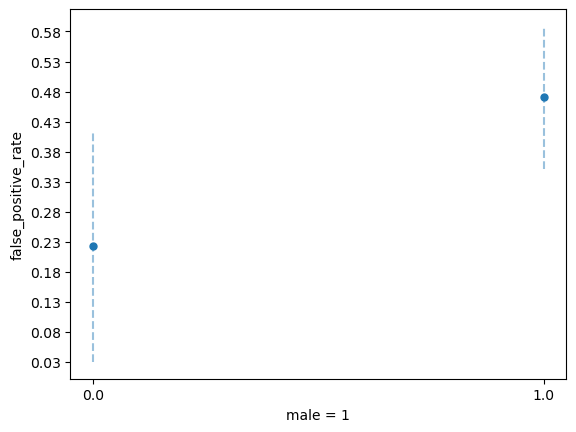

In [212]:
plot_group_metrics_with_error_bars(
    metricframe_unmitigated, "false_positive_rate", "false_positive_error"
)

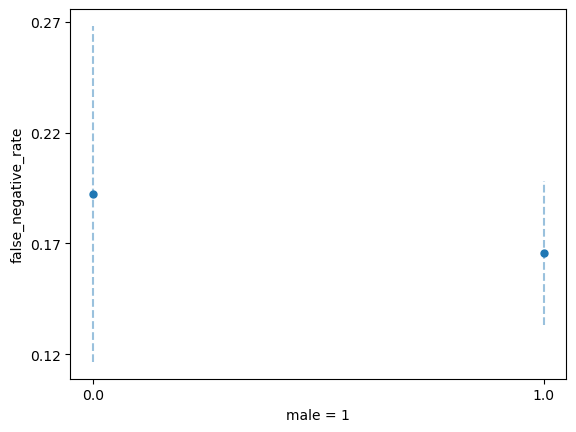

In [213]:
plot_group_metrics_with_error_bars(
    metricframe_unmitigated, "false_negative_rate", "false_negative_error"
)

array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='male'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='male'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='male'>]],
      dtype=object)

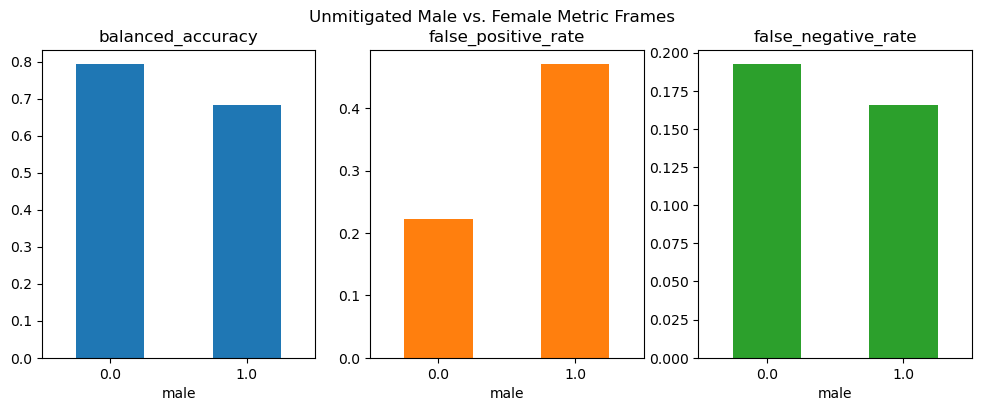

In [214]:
metricframe_unmitigated.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0, 
    title="Unmitigated Male vs. Female Metric Frames", 
)


In [215]:
#computing equlaized odds difference for the model 
#(maximum of false positive rate difference and false negative rate difference)
#minimize both because false positives and false negatives lead to harms
balanced_accuracy_unmitigated = balanced_accuracy_score(y_test, Y_pred)
equalized_odds_unmitigated = equalized_odds_difference(y_test, Y_pred, sensitive_features=A_test)
print(f" Balanced accuracy unmitigated = {balanced_accuracy_unmitigated}")
print(f" Equalized odds unmitigated = {equalized_odds_unmitigated}")

 Balanced accuracy unmitigated = 0.7055912914398812
 Equalized odds unmitigated = 0.24836601307189543


In [216]:
#threshold optimizer takes in existing ML model and predictions are scoring function
#scoring function identifies different thresholds for sensitive feature groups
#optimizes balanced accuracy subject to equalized odds fairness constraint
#balanced accuracy score optimizes the false positive rate and false negative rate at the same time
postprocess_est = ThresholdOptimizer(
    estimator=estimator,
    constraints="equalized_odds",  
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)

In [217]:
postprocess_est.fit(X=X_train, y=y_train, sensitive_features=A_train)

postprocess_pred = postprocess_est.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba = postprocess_est._pmf_predict(X_test, sensitive_features=A_test)

In [218]:
#compare the MetricFrame results
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):

    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [219]:
bal_acc_postprocess = balanced_accuracy_score(y_test, postprocess_pred)
eq_odds_postprocess = equalized_odds_difference(
    y_test, postprocess_pred, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]

balanced_accuracy      0.010413
false_positive_rate    0.063725
false_negative_rate    0.042899
dtype: float64

array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='male'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='male'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='male'>]],
      dtype=object)

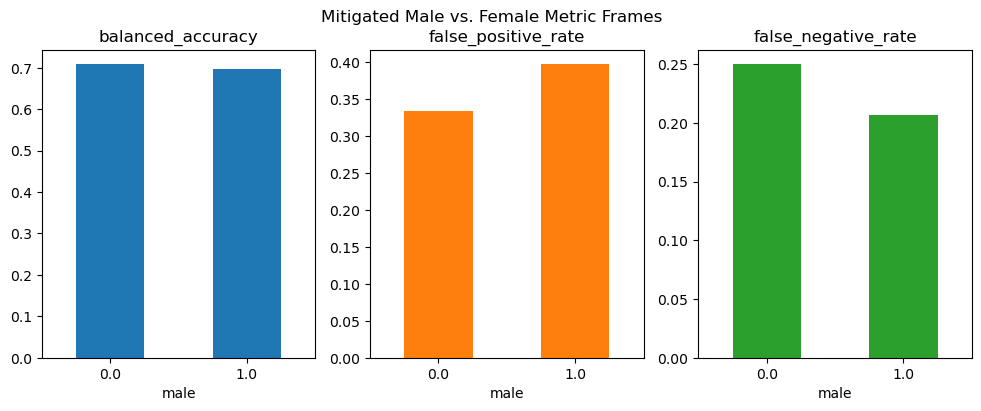

In [220]:
#compare threshold classifer result with unmitigated model
compare_metricframe_results(
    metricframe_unmitigated,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)

metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0, title="Mitigated Male vs. Female Metric Frames", 
)